In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
df = pd.read_csv('D:/Downloads/train_default/train.csv')
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [2]:
df.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [3]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [4]:
df.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
df.shape

(67463, 35)

In [7]:
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [8]:
group = df.groupby('Grade')
group.size()

Grade
A    12055
B    18742
C    19085
D     8259
E     6446
F     2246
G      630
dtype: int64

In [9]:
grade = {'A':5, 'B':6, 'C':7, 'D':4, 'E':3, 'F':2, 'G':1}
df['Grade'] = df['Grade'].map(grade)

In [10]:
group = df.groupby('Sub Grade')
group.size()

Sub Grade
A1    1364
A2    1837
A3    1685
A4    2264
A5    3540
B1    2924
B2    3520
B3    3999
B4    4462
B5    3408
C1    4188
C2    3219
C3    3121
C4    3250
C5    2472
D1    3304
D2    1963
D3    1824
D4    2050
D5    1952
E1    1298
E2    1746
E3    1321
E4    1117
E5     769
F1     824
F2     947
F3     578
F4     441
F5     582
G1     366
G2     447
G3     246
G4     151
G5     284
dtype: int64

In [11]:
subgrade = {'A1':15,'A2':19,'A3':16,'A4':23,'A5':32,'B1':25,'B2':31,'B3':33,'B4':35,'B5':30,
           'C1':34,'C2':27,'C3':26,'C4':28,'C5':24,'D1':29,'D2':21,'D3':18,'D4':22,'D5':20,
           'E1':13,'E2':17,'E3':14,'E4':12,'E5':9,'F1':10,'F2':11,'F3':7,'F4':5,'F5':8,
           'G1':4,'G2':6,'G3':2,'G4':1,'G5':3}
df['Sub Grade'] = df['Sub Grade'].map(subgrade)

In [12]:
group = df.groupby('Employment Duration')
group.size()

Employment Duration
MORTGAGE    36351
OWN          6962
RENT        24150
dtype: int64

In [13]:
empldur = {'MORTGAGE':3,'OWN':1,'RENT':2}
df['Employment Duration'] = df['Employment Duration'].map(empldur)

In [14]:
group = df.groupby('Verification Status')
group.size()

Verification Status
Not Verified       16349
Source Verified    33036
Verified           18078
dtype: int64

In [15]:
verification = {'Not Verified':1, 'Source Verified':3, 'Verified':2}
df['Verification Status'] = df['Verification Status'].map(verification)

In [16]:
group = df.groupby('Payment Plan')
group.size()

Payment Plan
n    67463
dtype: int64

In [17]:
payplan = {'n':1}
df['Payment Plan'] = df['Payment Plan'].map(payplan)

In [18]:
group = df.groupby('Loan Title')
group.size()

Loan Title
Bathroom               14
Bill Consolidation     15
Bill Payoff            12
Business              183
CC                      6
                     ... 
payoff                 50
personal               26
refi                   25
relief                  9
vacation               10
Length: 109, dtype: int64

In [19]:
df['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [20]:
df['Loan Title'].nunique()

109

In [21]:
loanTitle = {'Debt Consolidation':1, 'Debt consolidation':1, 'DEBT CONSOLIDATION':1, 'Debt Consolidation Loan':1, 'debt':1, 'debt consolidation':1, 'get out of debt':1, 'Debt':1, 'Credit Card Debt':1, 'Debt Consolidation 2013':1, 'debt loan':1, 'Get Debt Free':1, 'Debt Reduction':1, 'Debt Payoff':1, 'Debt Loan':1, 'Debt Free':1, 'debt consolidation loan':1, 'Debt payoff':1,
            'Home improvement':2, 'Home Improvement':2, 'home improvement':2, 'Home Improvement Loan':2, 
            'Home buying':3, 'Home':3, 'Home loan':3, 'House':3, 
            'Credit card refinancing':4, 'Credit Consolidation':4, 'Credit Cards':4, 'credit card consolidation':4, 'Credit card payoff':4, 'Credit Card Consolidation':4, 'credit card':4, 'Credit Card Refi':4, 'Credit Card Loan':4, 'Credit Card Debt':4, 'Credit Card':4, 'Credit Card Refinance':4, 'Credit Loan':4, 'credit card refinance':4, 'Credit Card consolidation':4, 'Credit Card Paydown':4, 'Credit card pay off':4, 'Credit card refinance':4, 'credit pay off':4, 'Credit':4, 'Credit Card Payoff':4, 'Credit payoff':4, 'Credit Card Refinance Loan':4,
            'CC Refi':5, 'CC Refinance':5, 'CC consolidation':5, 'CC-Refinance':5, 'CC Consolidation':5, 'CC Loan':5, 'CC':5, 'Green loan':5, 'Loan 1':5, 'MYLOAN':5, 'My Loan':5, 'Loan':5, 
            'Other':6,
            'Moving and Relocation':7,
            'Medical expenses':8, 'Medical':8, 'Medical loan':8, 
            'Refinance':9, 'refi':9, 'Refinance Loan':9, 
            'Lending Club':10, 'Lending loan':10, 
            'Major Purchase':11,
            'Vacation':12, 'vacation':12, 
            'Business':13, 
            'Personal Loan':14, 'Personal loan':14, 'Personal':14, 'personal':14, 
            'consolidate':15, 'Consolidation':15, 'Consolidate':15, 'Consolidated':15, 'consolidation loan':15, 'Consolidation Loan':15, 'Bill Consolidation':15, 'consolidation':15, 'CONSOLIDATE':15, 'CONSOLIDATION':15, 'conso':15, 'Loan Consolidation':15,
            'Card Consolidation':16, 'cards':16, 'Cards':16, 
            'Car financing':17, 'Car Loan':17, 
            'Freedom':18, 'Bathroom':18, 
            'payoff':19, 'Payoff':19, 'Bill Payoff':19, 'pay off bills':19, 'Pay Off':19, 'bills':19,
            'Wedding Loan':20, 
            'Pool':21, 
            'relief':22}
df['Loan Title'] = df['Loan Title'].map(loanTitle)

In [22]:
df[['Home Ownership','Verification Status', 'Payment Plan', 'Loan Title', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance']].head()

,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance
0,176346.62670,1,1,1.0,16.284758,1,0,13,0,24246
1,39833.92100,3,1,1.0,15.412409,0,0,12,0,812
2,91506.69105,3,1,1.0,28.137619,0,0,14,0,1843
3,108286.57590,3,1,1.0,18.043730,1,0,7,0,13819
4,44234.82545,3,1,4.0,17.209886,1,3,13,1,1544


In [23]:
df[['Revolving Utilities', 'Total Accounts', 'Initial List Status', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Application Type', 'Last week Pay']].head()

,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay
0,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49
1,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109
2,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66
3,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39
4,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18


In [24]:
group = df.groupby('Initial List Status')
group.size()

Initial List Status
f    31164
w    36299
dtype: int64

In [25]:
listStatus = {'f':1,'w':2}
df['Initial List Status'] = df['Initial List Status'].map(listStatus)

In [26]:
group = df.groupby('Application Type')
group.size()

Application Type
INDIVIDUAL    67340
JOINT           123
dtype: int64

In [27]:
appl = {'INDIVIDUAL':2,'JOINT':1}
df['Application Type'] = df['Application Type'].map(appl)

In [28]:
df['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [29]:
df.isnull().sum()

ID                                0
Loan Amount                       0
Funded Amount                     0
Funded Amount Investor            0
Term                              0
Batch Enrolled                    0
Interest Rate                     0
Grade                             0
Sub Grade                         0
Employment Duration               0
Home Ownership                    0
Verification Status               0
Payment Plan                      0
Loan Title                      676
Debit to Income                   0
Delinquency - two years           0
Inquires - six months             0
Open Account                      0
Public Record                     0
Revolving Balance                 0
Revolving Utilities               0
Total Accounts                    0
Initial List Status               0
Total Received Interest           0
Total Received Late Fee           0
Recoveries                        0
Collection Recovery Fee           0
Collection 12 months Medical

In [ ]:
#Implementing the model stacking in ensemble learning approach

In [30]:
#def evaluate_model(X, y, model=None, test_size=0.2, random_state=44):
def evaluate_model(X, y, model=None):
    
    if model is None:
        model = LogisticRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
    #model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'f1 score: {f1:.2f}')
    print(f'precision: {precision:.2f}')
    print(f'recall: {recall:.2f}')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling._smote import SMOTE

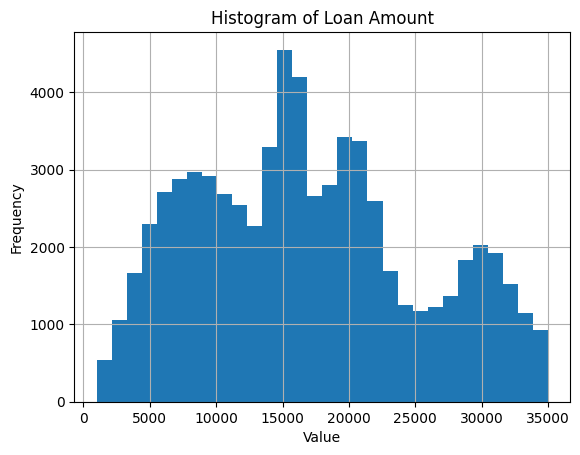

In [32]:
df['Loan Amount'].hist(bins=30)
plt.title('Histogram of Loan Amount')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

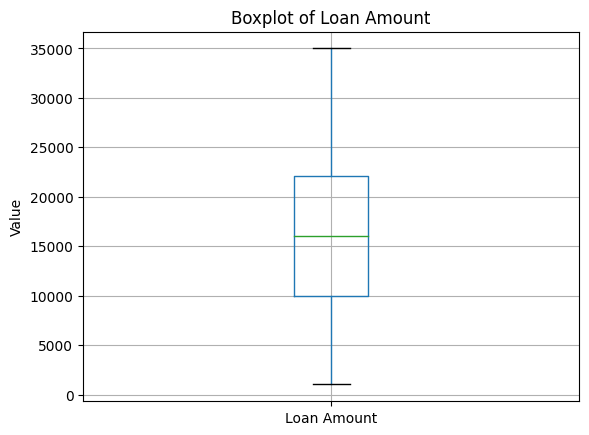

In [33]:
df.boxplot(column='Loan Amount')
plt.title('Boxplot of Loan Amount')
plt.ylabel('Value')
plt.show()

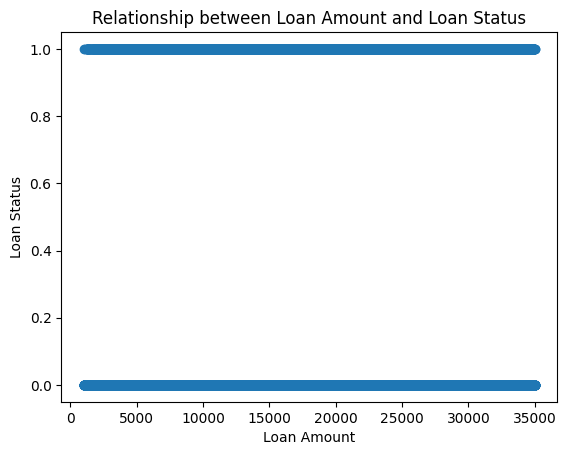

In [34]:
plt.scatter(x=df['Loan Amount'], y=df['Loan Status'])
plt.title('Relationship between Loan Amount and Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show()

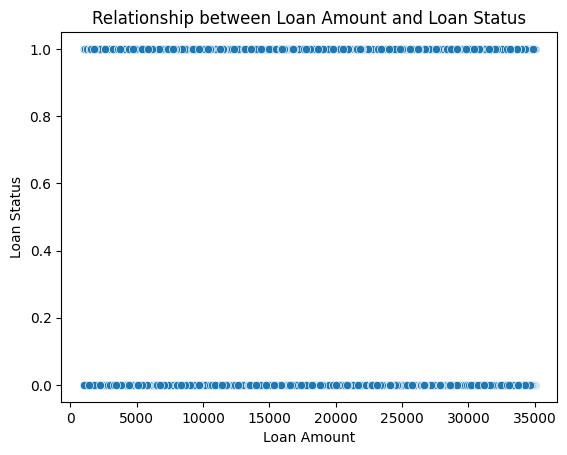

In [35]:
sns.scatterplot(x='Loan Amount', y='Loan Status', data=df)
plt.title('Relationship between Loan Amount and Loan Status')
plt.show()

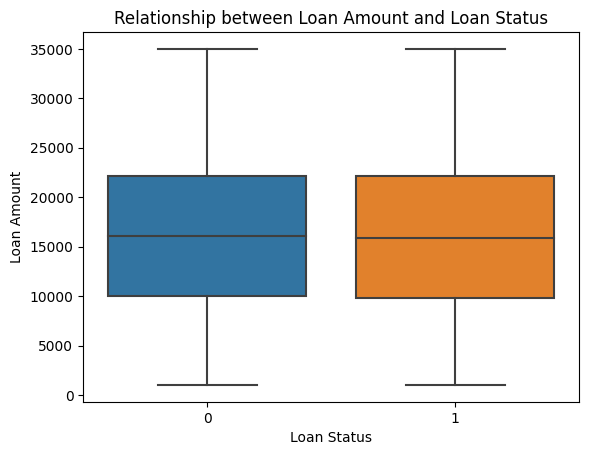

In [36]:
sns.boxplot(x='Loan Status', y='Loan Amount', data=df)
plt.title('Relationship between Loan Amount and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [37]:
#to identify what those peak of multimodal represent 
df['LoanAmountBin'] = pd.cut(df['Loan Amount'], bins=4) #bin equal to no. of multimodal

In [38]:
df['LoanAmountBin'].head()

0     (9510.5, 18007.0]
1     (980.014, 9510.5]
2    (26503.5, 35000.0]
3     (9510.5, 18007.0]
4     (9510.5, 18007.0]
Name: LoanAmountBin, dtype: category
Categories (4, interval[float64, right]): [(980.014, 9510.5] < (9510.5, 18007.0] < (18007.0, 26503.5] < (26503.5, 35000.0]]

In [39]:
df['LoanAmountBins'] = pd.cut(df['Loan Amount'], bins=[980.014, 9510.5, 18007.0, 26503.5, 35000.0],
                             labels=[1, 2, 3, 4])

In [40]:
df['LoanAmountBins'].head()

0    2
1    1
2    4
3    2
4    2
Name: LoanAmountBins, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

<Axes: xlabel='Loan Amount', ylabel='Count'>

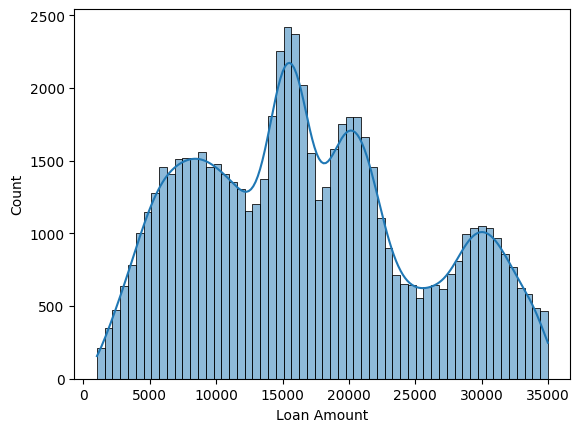

In [41]:
#Overlay kde plot to understand shape and density
#just like histogram above
sns.histplot(df['Loan Amount'], kde=True)

<Axes: xlabel='Loan Amount', ylabel='Count'>

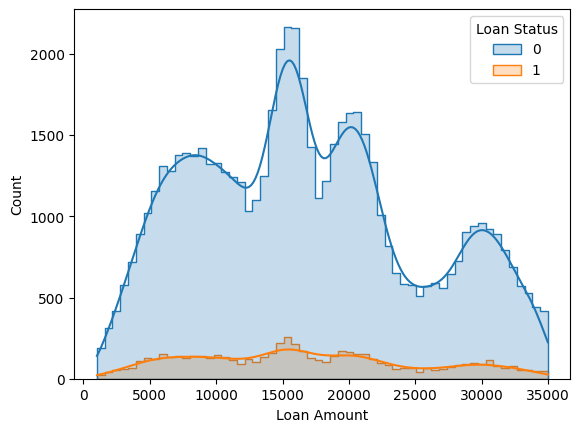

In [42]:
#Group by Loan Status
#compare distributions for defaulters vs. non defaulters
sns.histplot(data=df, x='Loan Amount', hue='Loan Status', kde=True, element='step')

In [43]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52


In [44]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['LoanAmountBins']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.54
precision: 0.50
recall: 0.59


In [ ]:
#feature engineering tips

In [ ]:
df['LoanToIncomeRatio'] = df['Loan Amount'] / df['Annual Income']
#There is no column named annual income

In [45]:
#Interaction term to capture risk across tenure.
df['LoanEmpInteraction'] = df['Loan Amount'] * df['Employment Duration']

In [46]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['LoanEmpInteraction']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.53
precision: 0.51
recall: 0.54


In [47]:
#Normalized Loan Amount
#Standardize for modeling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['LoanAmountNorm'] = scaler.fit_transform(df[['Loan Amount']])

In [48]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['LoanAmountNorm']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52


In [49]:
import numpy as np
df['LoanAmountLog'] = np.log1p(df['Loan Amount'])

In [50]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['LoanAmountLog']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.39


In [ ]:
#Again no annual income column
conditions = [
    (df['Loan Amount'] > 25000) & (df['Annual Income'] < 50000),
    (df['Loan Amount'] < 10000) & (df['Annual Income'] > 100000)
]
choices = ['High Risk', 'Low Risk']
df['RiskTier'] = np.select(conditions, choices, default='Medium Risk')  

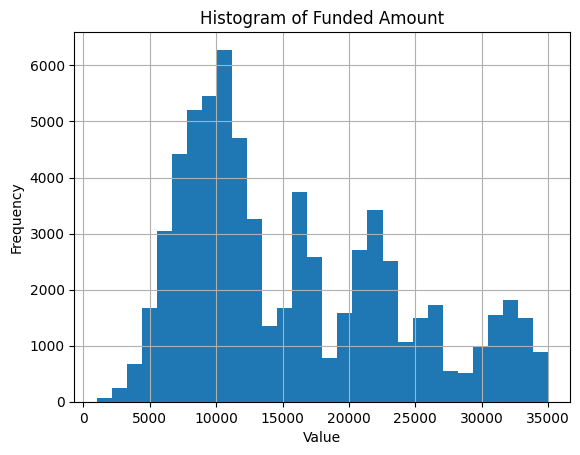

In [51]:
df['Funded Amount'].hist(bins=30)
plt.title('Histogram of Funded Amount')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Funded Amount', ylabel='Count'>

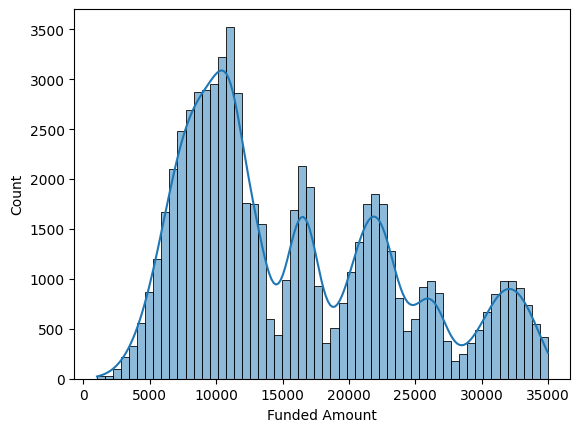

In [52]:
sns.histplot(df['Funded Amount'], kde=True)

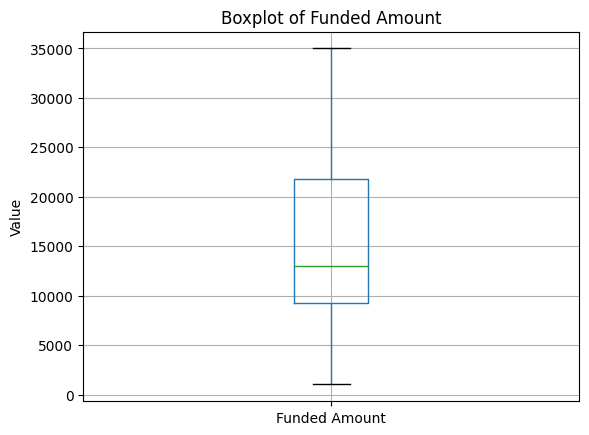

In [53]:
df.boxplot(column='Funded Amount')
plt.title('Boxplot of Funded Amount')
plt.ylabel('Value')
plt.show()

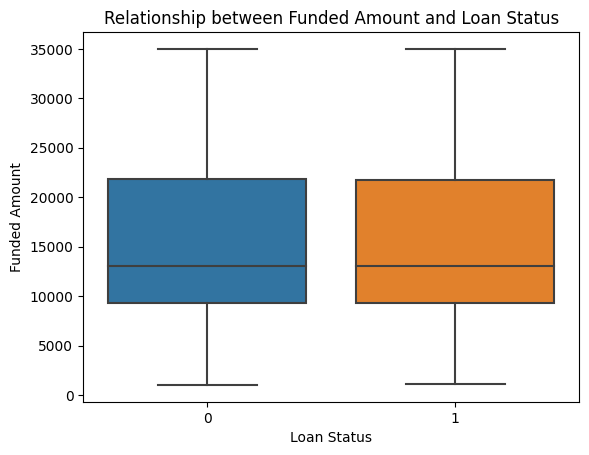

In [54]:
sns.boxplot(x='Loan Status', y='Funded Amount', data=df)
plt.title('Relationship between Funded Amount and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount')
plt.show()

In [55]:
df['FundedAmountBin'] = pd.cut(df['Funded Amount'], bins=5) #bin equal to no. of multimodal

In [56]:
df['FundedAmountBin'].head()

0    (28202.0, 34999.0]
1     (7811.0, 14608.0]
2     (7811.0, 14608.0]
3     (980.015, 7811.0]
4     (7811.0, 14608.0]
Name: FundedAmountBin, dtype: category
Categories (5, interval[float64, right]): [(980.015, 7811.0] < (7811.0, 14608.0] < (14608.0, 21405.0] < (21405.0, 28202.0] < (28202.0, 34999.0]]

In [57]:
df['FundedAmountBins'] = pd.cut(df['Funded Amount'], bins=[980.015, 7811.0, 14608.0, 21405.0, 28202.0, 34999.0],
                             labels=[1, 2, 3, 4, 5])

In [58]:
df['FundedAmountBins'].head()

0    5
1    2
2    2
3    1
4    2
Name: FundedAmountBins, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: xlabel='Funded Amount', ylabel='Count'>

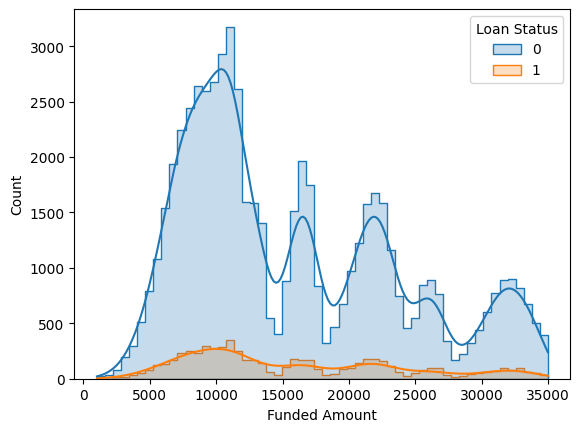

In [59]:
#Group by Loan Status
#compare distributions for defaulters vs. non defaulters
sns.histplot(data=df, x='Funded Amount', hue='Loan Status', kde=True, element='step')

In [60]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Funded Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38


In [61]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['FundedAmountBins']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.48
precision: 0.50
recall: 0.47


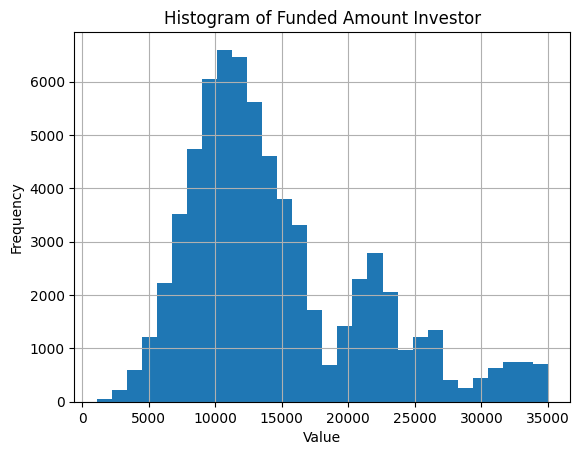

In [62]:
df['Funded Amount Investor'].hist(bins=30)
plt.title('Histogram of Funded Amount Investor')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Funded Amount Investor', ylabel='Count'>

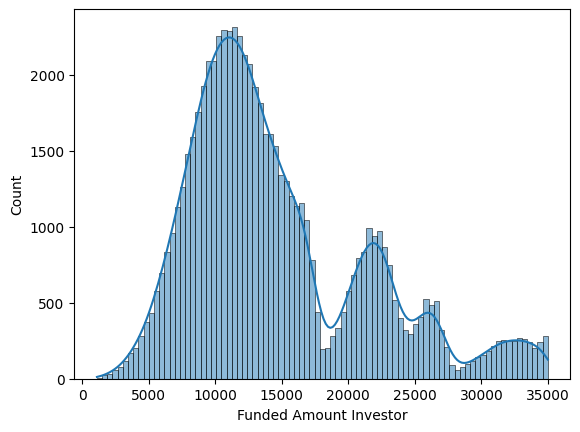

In [63]:
sns.histplot(df['Funded Amount Investor'], kde=True)

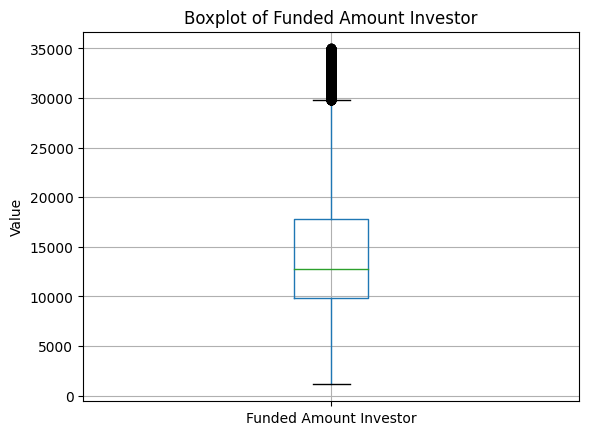

In [64]:
df.boxplot(column='Funded Amount Investor')
plt.title('Boxplot of Funded Amount Investor')
plt.ylabel('Value')
plt.show()

In [65]:
df['fai'] = df['Funded Amount Investor']
df.query('fai > 30000')
#values not data entry error

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Revolving Credit Limit,Loan Status,LoanAmountBin,LoanAmountBins,LoanEmpInteraction,LoanAmountNorm,LoanAmountLog,FundedAmountBin,FundedAmountBins,fai
14,3922183,31157,9885,31585.98335,59,BAT5849876,9.016252,7,35,1,...,12827,0,"(26503.5, 35000.0]",4,31157,1.709899,10.346826,"(7811.0, 14608.0]",2,31585.98335
43,1853549,4710,24672,32097.00319,59,BAT1467036,20.138581,3,9,3,...,6544,0,"(980.014, 9510.5]",1,14130,-1.450668,8.457655,"(21405.0, 28202.0]",4,32097.00319
53,6477549,31289,12661,33261.50825,59,BAT2333412,7.438743,4,34,3,...,8194,0,"(26503.5, 35000.0]",4,93867,1.725674,10.351054,"(7811.0, 14608.0]",2,33261.50825
72,7774779,22942,11618,30377.96627,59,BAT2078974,15.261532,6,23,2,...,17285,0,"(18007.0, 26503.5]",3,45884,0.728160,10.040768,"(7811.0, 14608.0]",2,30377.96627
76,63629135,15033,22997,31357.05456,59,BAT3873588,11.184074,7,25,2,...,18598,0,"(9510.5, 18007.0]",2,30066,-0.217011,9.618070,"(21405.0, 28202.0]",4,31357.05456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67344,61868194,15096,15704,34580.74065,58,BAT1930365,5.856213,3,18,1,...,9556,0,"(9510.5, 18007.0]",2,15096,-0.209482,9.622251,"(14608.0, 21405.0]",3,34580.74065
67345,35104061,8002,17753,32549.77241,59,BAT5714674,11.861954,3,12,3,...,36654,0,"(980.014, 9510.5]",1,24006,-1.057255,8.987572,"(14608.0, 21405.0]",3,32549.77241
67346,8271332,29155,14666,32455.68448,58,BAT2558388,6.869851,6,28,3,...,18641,0,"(26503.5, 35000.0]",4,87465,1.470648,10.280416,"(14608.0, 21405.0]",3,32455.68448
67428,13642691,8048,23351,31865.64511,59,BAT4722912,10.861096,6,15,3,...,1207,0,"(980.014, 9510.5]",1,24144,-1.051758,8.993303,"(21405.0, 28202.0]",4,31865.64511


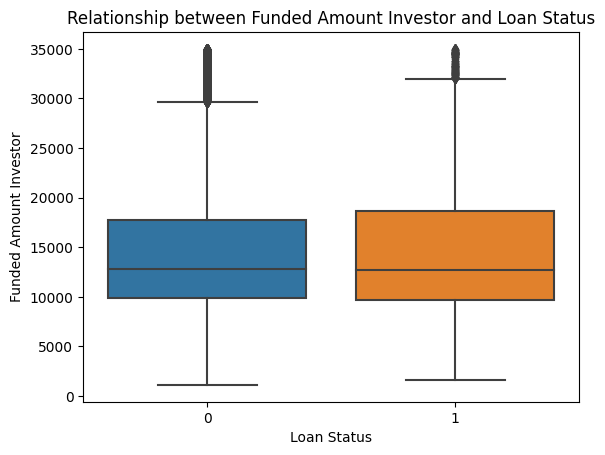

In [66]:
sns.boxplot(x='Loan Status', y='Funded Amount Investor', data=df)
plt.title('Relationship between Funded Amount Investor and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount Investor')
plt.show()

In [67]:
df['FundedAmountInvestorBin'] = pd.cut(df['Funded Amount Investor'], bins=4) #bin equal to no. of multimodal

In [68]:
df['FundedAmountInvestorBin'].head()

0     (9585.879, 18057.168]
1     (9585.879, 18057.168]
2    (18057.168, 26528.457]
3     (9585.879, 18057.168]
4     (9585.879, 18057.168]
Name: FundedAmountInvestorBin, dtype: category
Categories (4, interval[float64, right]): [(1080.705, 9585.879] < (9585.879, 18057.168] < (18057.168, 26528.457] < (26528.457, 34999.746]]

In [69]:
df['FundedAmountInvestorBins'] = pd.cut(df['Funded Amount Investor'], bins=[1080.705, 9585.879, 18057.168, 26528.457, 34999.746],
                             labels=[1, 2, 3, 4])

In [70]:
df['FundedAmountInvestorBins'].head()

0    2
1    2
2    3
3    2
4    2
Name: FundedAmountInvestorBins, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [71]:
df['FundedAmountInvestorBins'].isnull().sum()

1

In [72]:
df['FundedAmountInvestorBins'].fillna(value=1, inplace=True)

In [73]:
df['FundedAmountInvestorBins'].isnull().sum()

0

<Axes: xlabel='Funded Amount Investor', ylabel='Count'>

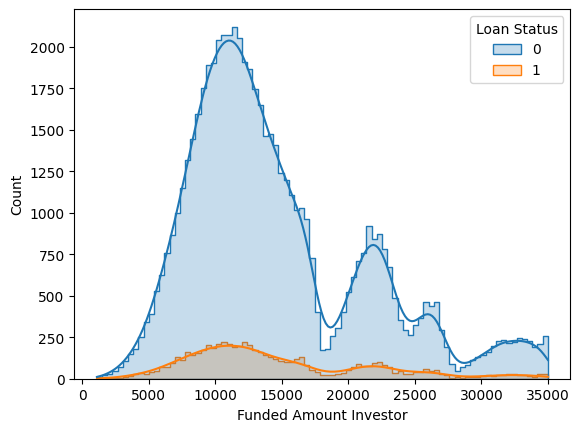

In [74]:
#Group by Loan Status
#compare distributions for defaulters vs. non defaulters
sns.histplot(data=df, x='Funded Amount Investor', hue='Loan Status', kde=True, element='step')

In [75]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Funded Amount Investor']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.37
precision: 0.50
recall: 0.29


In [76]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['FundedAmountInvestorBins']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.34
precision: 0.51
recall: 0.26


In [77]:
#feature engineering
df['HighFundedRisk'] = (df['Funded Amount Investor'] > df['Funded Amount Investor'].median()).astype(int)

In [78]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['HighFundedRisk']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51


In [ ]:
#no such column
df['FundedIncomeRatio'] = df['Funded Amount Investor'] / df['Annual Income']

In [79]:
#segment into risk tiers
df['FundedBin'] = pd.qcut(df['Funded Amount Investor'], q=4, labels=[1, 2, 3, 4])

In [80]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['FundedBin']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51


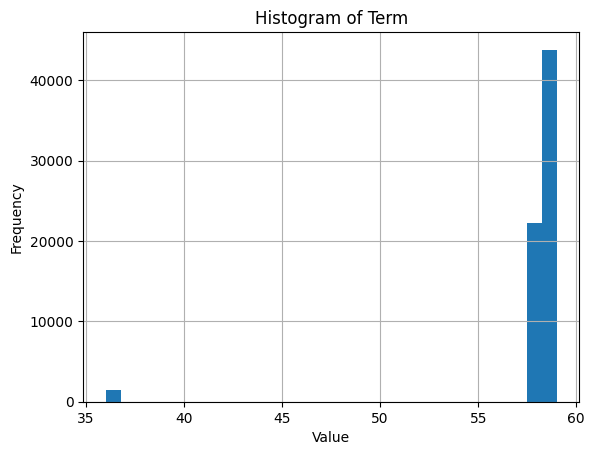

In [81]:
df['Term'].hist(bins=30)
plt.title('Histogram of Term')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Term', ylabel='Count'>

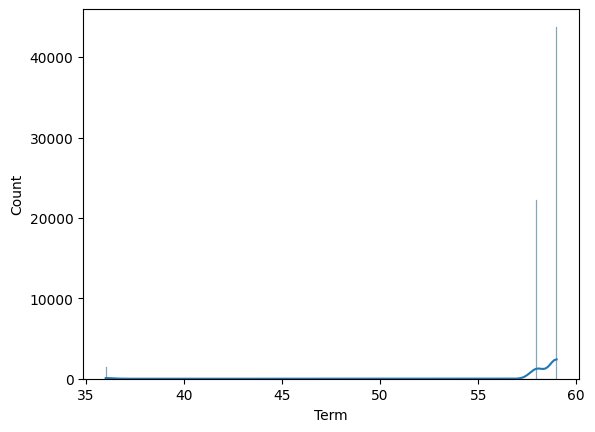

In [82]:
sns.histplot(df['Term'], kde=True)

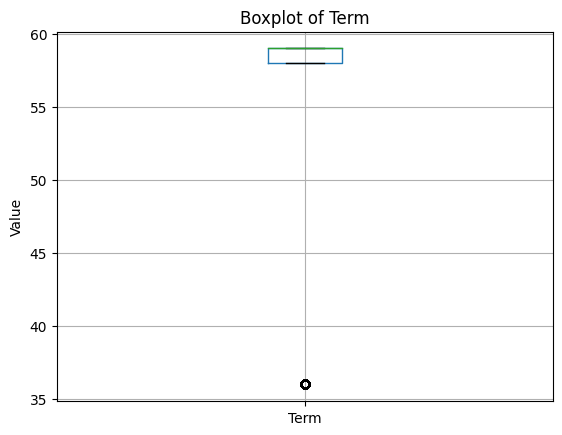

In [83]:
df.boxplot(column='Term')
plt.title('Boxplot of Term')
plt.ylabel('Value')
plt.show()

In [85]:
df.query('Term < 40')
#Outlier not data entry error

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,LoanEmpInteraction,LoanAmountNorm,LoanAmountLog,FundedAmountBin,FundedAmountBins,fai,FundedAmountInvestorBin,FundedAmountInvestorBins,HighFundedRisk,FundedBin
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,6,3,2,...,69262,2.125061,10.452533,"(28202.0, 34999.0]",5,8635.931613,"(1080.705, 9585.879]",1,0,1
15,9813088,27859,33502,16545.203070,36,BAT2833642,14.848190,6,23,1,...,27859,1.315769,10.234947,"(28202.0, 34999.0]",5,16545.203070,"(9585.879, 18057.168]",2,1,3
57,29852082,14592,12927,4079.189091,36,BAT2803411,14.320346,7,5,2,...,29184,-0.269713,9.588297,"(7811.0, 14608.0]",2,4079.189091,"(1080.705, 9585.879]",1,0,1
73,56187609,15190,13289,11555.982570,36,BAT3873588,6.130753,7,31,2,...,30380,-0.198248,9.628458,"(7811.0, 14608.0]",2,11555.982570,"(9585.879, 18057.168]",2,0,2
126,30669778,8539,5308,21717.859960,36,BAT2575549,18.042220,7,33,2,...,17078,-0.993081,9.052516,"(980.015, 7811.0]",1,21717.859960,"(18057.168, 26528.457]",3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67340,24480720,28865,11064,14539.922830,36,BAT5714674,15.615360,5,29,3,...,86595,1.435992,10.270420,"(7811.0, 14608.0]",2,14539.922830,"(9585.879, 18057.168]",2,1,3
67398,38336158,15939,8863,18915.327980,36,BAT2003848,11.859881,7,13,2,...,31878,-0.108739,9.676587,"(7811.0, 14608.0]",2,18915.327980,"(18057.168, 26528.457]",3,1,4
67411,19075875,6741,14125,15369.398280,36,BAT4271519,12.087572,3,33,3,...,20223,-1.207952,8.816112,"(7811.0, 14608.0]",2,15369.398280,"(9585.879, 18057.168]",2,1,3
67417,13136655,9315,15432,20434.941700,36,BAT1780517,14.009766,5,23,2,...,18630,-0.900344,9.139489,"(14608.0, 21405.0]",3,20434.941700,"(18057.168, 26528.457]",3,1,4


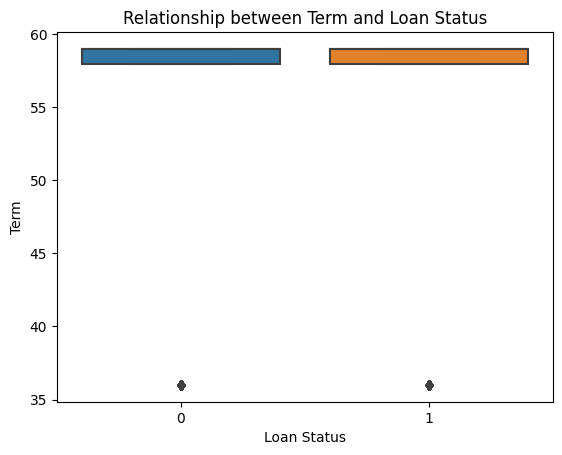

In [86]:
sns.boxplot(x='Loan Status', y='Term', data=df)
plt.title('Relationship between Term and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Term')
plt.show()

In [87]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Term']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.04
precision: 0.51
recall: 0.02


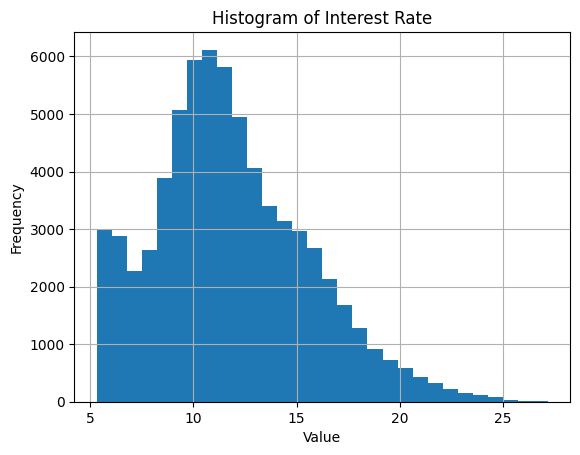

In [88]:
df['Interest Rate'].hist(bins=30)
plt.title('Histogram of Interest Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Interest Rate', ylabel='Count'>

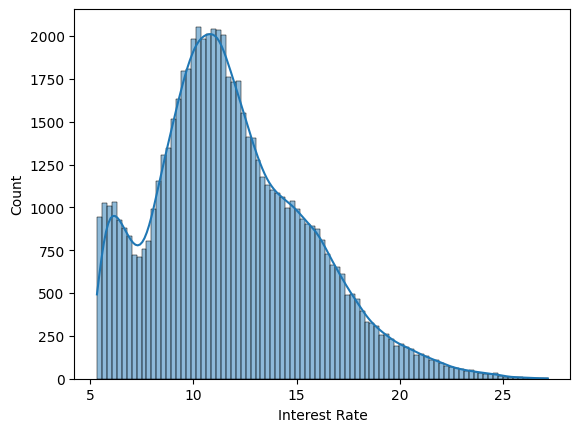

In [89]:
sns.histplot(df['Interest Rate'], kde=True)

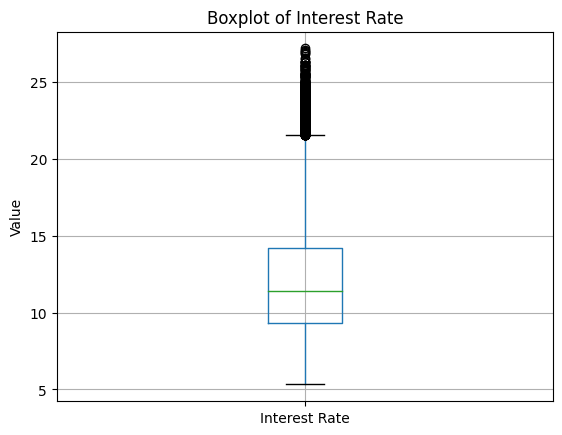

In [90]:
df.boxplot(column='Interest Rate')
plt.title('Boxplot of Interest Rate')
plt.ylabel('Value')
plt.show()

In [92]:
df['ir'] = df['Interest Rate']
df.query('ir > 20')
#Outlier not data entry error

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,LoanAmountNorm,LoanAmountLog,FundedAmountBin,FundedAmountBins,fai,FundedAmountInvestorBin,FundedAmountInvestorBins,HighFundedRisk,FundedBin,ir
41,10527261,14763,12923,19905.775350,59,BAT5525466,20.097031,6,22,2,...,-0.249277,9.599947,"(7811.0, 14608.0]",2,19905.775350,"(18057.168, 26528.457]",3,1,4,20.097031
43,1853549,4710,24672,32097.003190,59,BAT1467036,20.138581,3,9,3,...,-1.450668,8.457655,"(21405.0, 28202.0]",4,32097.003190,"(26528.457, 34999.746]",4,1,4,20.138581
49,9747171,4959,8318,23011.484590,59,BAT3873588,20.264981,3,28,3,...,-1.420911,8.509161,"(7811.0, 14608.0]",2,23011.484590,"(18057.168, 26528.457]",3,1,4,20.264981
79,5777207,18874,16334,9289.247238,59,BAT3865626,22.019769,7,5,3,...,0.242011,9.845594,"(14608.0, 21405.0]",3,9289.247238,"(1080.705, 9585.879]",1,0,1,22.019769
92,19027988,32707,23082,27140.618580,59,BAT2522922,21.083931,4,35,3,...,1.895133,10.395375,"(21405.0, 28202.0]",4,27140.618580,"(26528.457, 34999.746]",4,1,4,21.083931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67169,3028289,8980,7791,6426.263640,59,BAT2575549,25.814732,3,28,3,...,-0.940379,9.102867,"(980.015, 7811.0]",1,6426.263640,"(1080.705, 9585.879]",1,0,1,25.814732
67291,8593994,16036,4344,17874.057410,59,BAT2252229,20.696965,7,11,3,...,-0.097146,9.682654,"(980.015, 7811.0]",1,17874.057410,"(9585.879, 18057.168]",2,1,4,20.696965
67292,33082504,30362,8219,21453.311180,59,BAT5341619,20.913114,2,30,2,...,1.614892,10.320980,"(7811.0, 14608.0]",2,21453.311180,"(18057.168, 26528.457]",3,1,4,20.913114
67367,51536754,9144,5270,10831.916810,59,BAT3873588,20.146258,7,26,2,...,-0.920780,9.120963,"(980.015, 7811.0]",1,10831.916810,"(9585.879, 18057.168]",2,0,2,20.146258


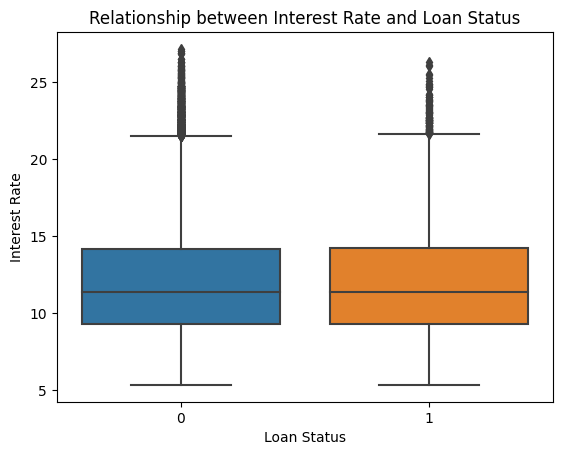

In [93]:
sns.boxplot(x='Loan Status', y='Interest Rate', data=df)
plt.title('Relationship between Interest Rate and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

In [94]:
df['InterestRateBin'] = pd.cut(df['Interest Rate'], bins=2) #bin equal to no. of multimodal

In [95]:
df['InterestRateBin'].head()

0     (5.298, 16.251]
1     (5.298, 16.251]
2     (5.298, 16.251]
3    (16.251, 27.182]
4     (5.298, 16.251]
Name: InterestRateBin, dtype: category
Categories (2, interval[float64, right]): [(5.298, 16.251] < (16.251, 27.182]]

In [102]:
df['InterestRateBins'] = pd.cut(df['Interest Rate'], bins=[5.298, 16.251, 27.182],
                             labels=[1, 2])

In [103]:
df['InterestRateBins'].head()

0    1
1    1
2    1
3    2
4    1
Name: InterestRateBins, dtype: category
Categories (2, int64): [1 < 2]

In [104]:
df['InterestRateBins'].isnull().sum()

1

In [105]:
df['InterestRateBins'].fillna(value=1, inplace=True)

In [106]:
df['InterestRateBins'].isnull().sum()

0

In [107]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Interest Rate']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.42
precision: 0.50
recall: 0.36


In [108]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['InterestRateBins']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


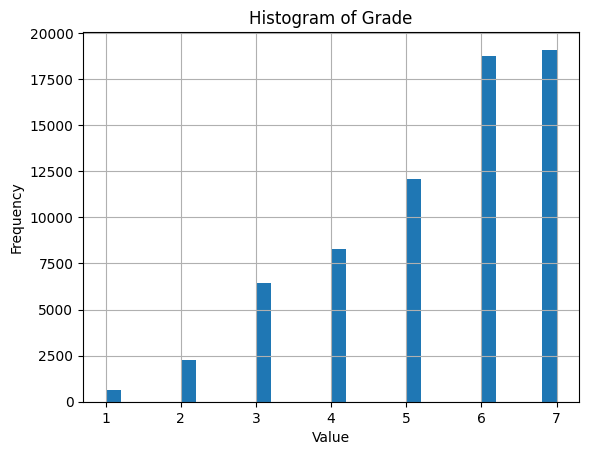

In [109]:
df['Grade'].hist(bins=30)
plt.title('Histogram of Grade')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Grade', ylabel='Count'>

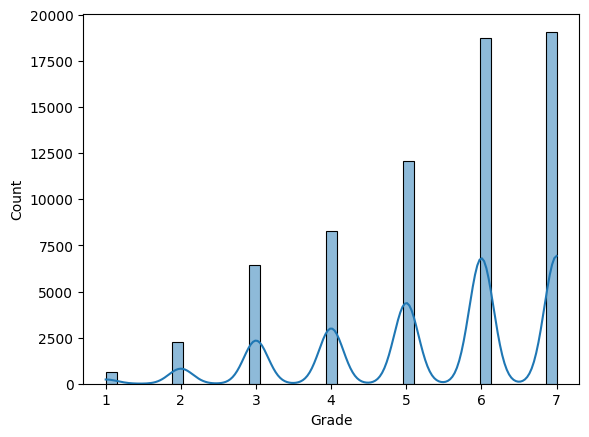

In [110]:
sns.histplot(df['Grade'], kde=True)

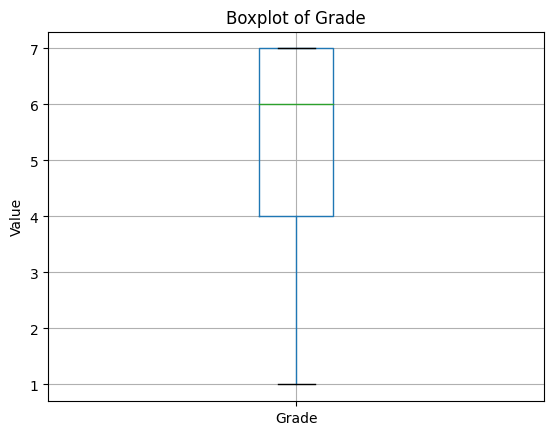

In [111]:
df.boxplot(column='Grade')
plt.title('Boxplot of Grade')
plt.ylabel('Value')
plt.show()

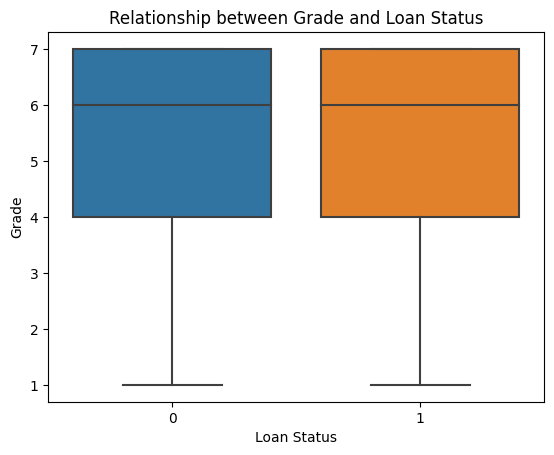

In [112]:
sns.boxplot(x='Loan Status', y='Grade', data=df)
plt.title('Relationship between Grade and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.show()

In [113]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Grade']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.45


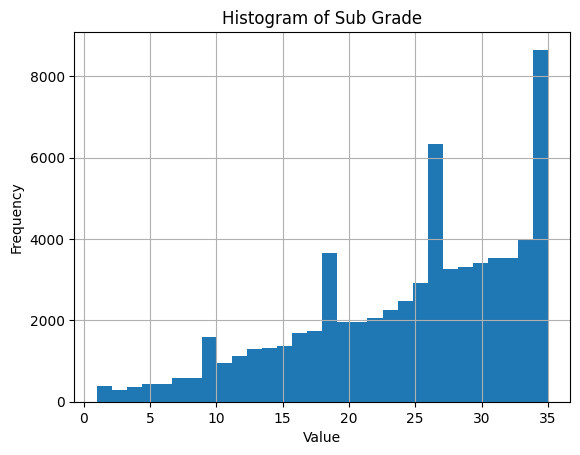

In [114]:
df['Sub Grade'].hist(bins=30)
plt.title('Histogram of Sub Grade')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Sub Grade', ylabel='Count'>

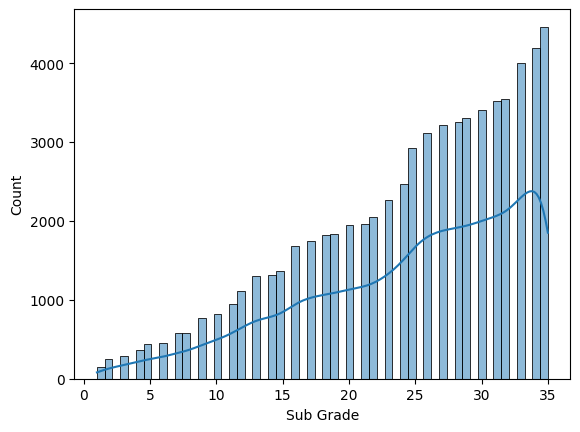

In [115]:
sns.histplot(df['Sub Grade'], kde=True)

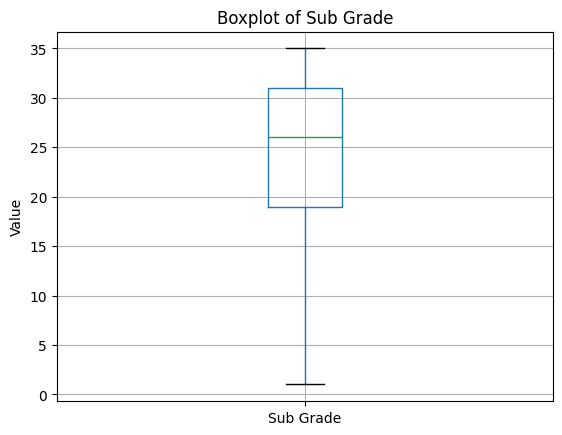

In [116]:
df.boxplot(column='Sub Grade')
plt.title('Boxplot of Sub Grade')
plt.ylabel('Value')
plt.show()

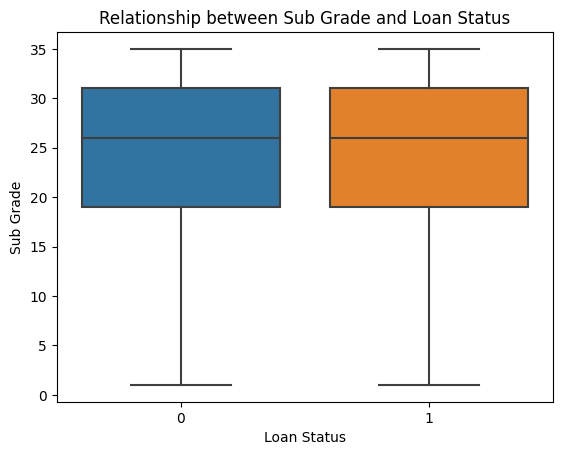

In [117]:
sns.boxplot(x='Loan Status', y='Sub Grade', data=df)
plt.title('Relationship between Sub Grade and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Sub Grade')
plt.show()

In [118]:
df['Sub Grade'].head()

0    28
1    18
2    22
3    26
4    22
Name: Sub Grade, dtype: int64

In [119]:
df['Sub Grade'].isnull().sum()

0

In [120]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Sub Grade']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43


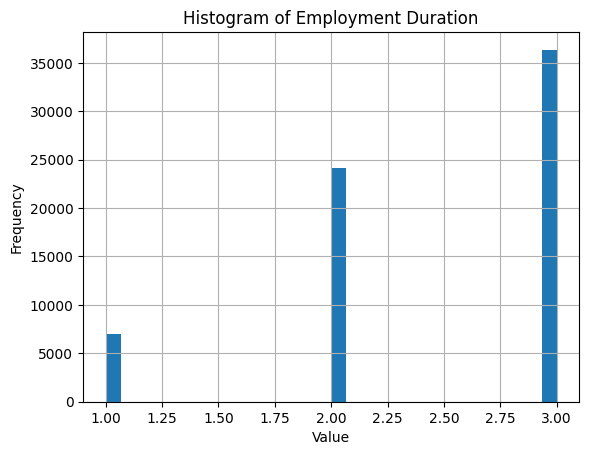

In [121]:
df['Employment Duration'].hist(bins=30)
plt.title('Histogram of Employment Duration')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Employment Duration', ylabel='Count'>

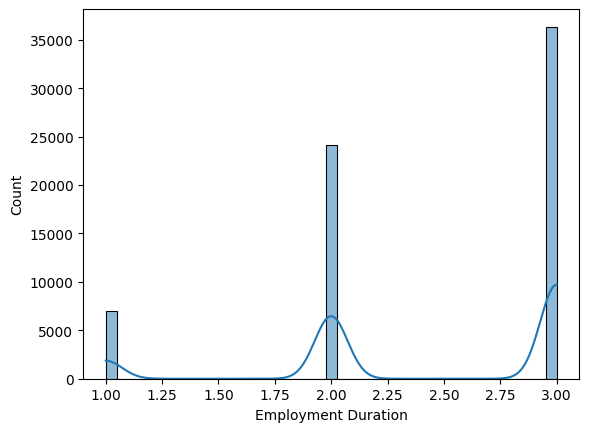

In [122]:
sns.histplot(df['Employment Duration'], kde=True)

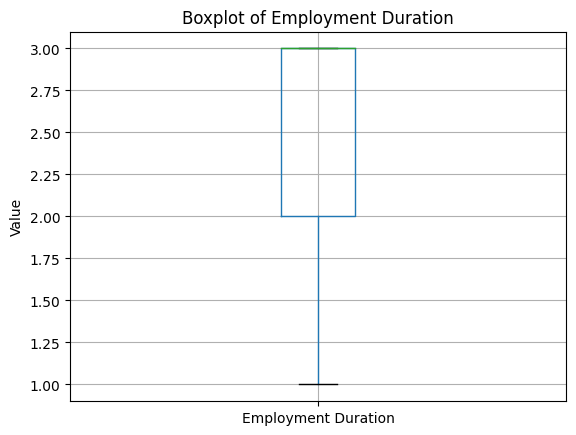

In [123]:
df.boxplot(column='Employment Duration')
plt.title('Boxplot of Employment Duration')
plt.ylabel('Value')
plt.show()

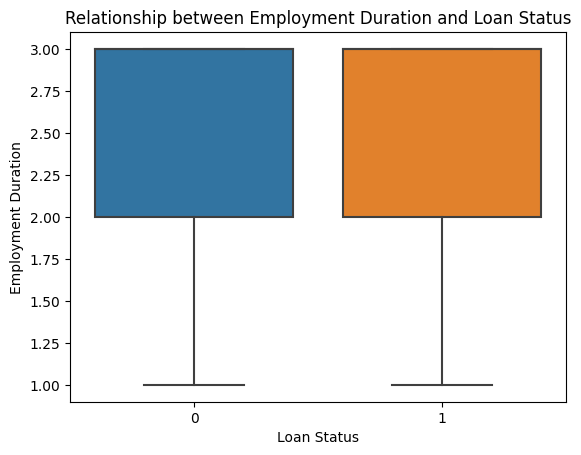

In [124]:
sns.boxplot(x='Loan Status', y='Employment Duration', data=df)
plt.title('Relationship between Employment Duration and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Duration')
plt.show()

In [125]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.49
precision: 0.51
recall: 0.47


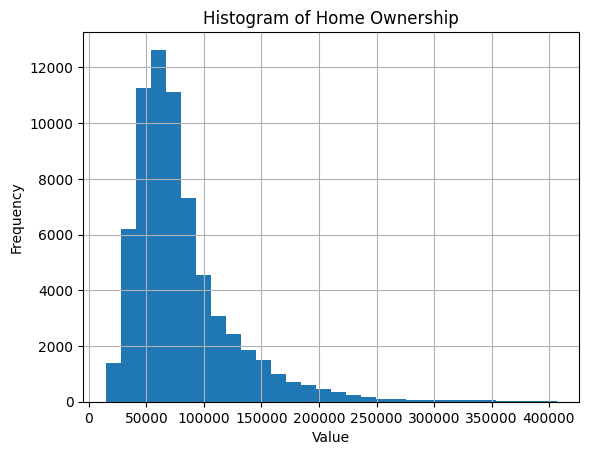

In [126]:
df['Home Ownership'].hist(bins=30)
plt.title('Histogram of Home Ownership')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Home Ownership', ylabel='Count'>

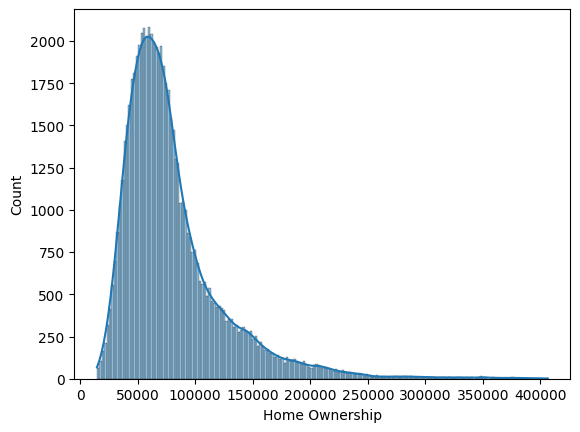

In [127]:
sns.histplot(df['Home Ownership'], kde=True)

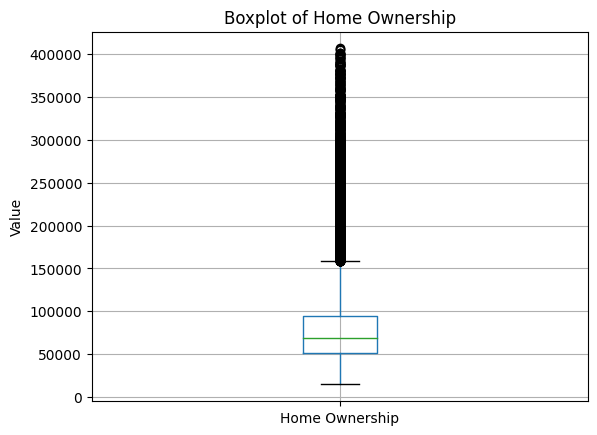

In [128]:
df.boxplot(column='Home Ownership')
plt.title('Boxplot of Home Ownership')
plt.ylabel('Value')
plt.show()

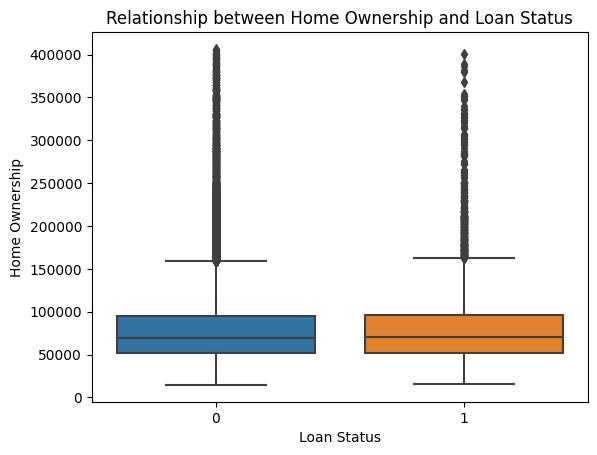

In [129]:
sns.boxplot(x='Loan Status', y='Home Ownership', data=df)
plt.title('Relationship between Home Ownership and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Home Ownership')
plt.show()

In [130]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Home Ownership']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.40
precision: 0.50
recall: 0.34


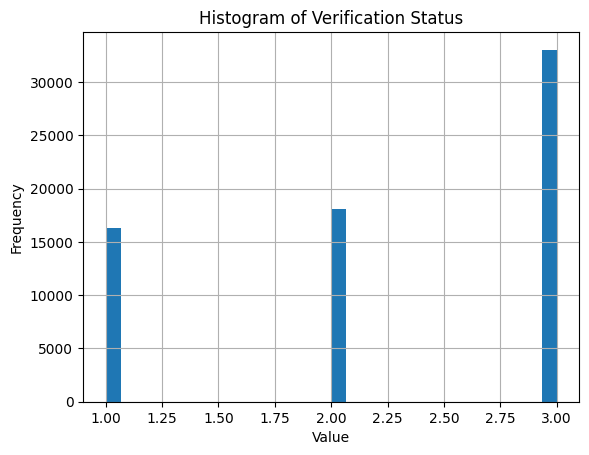

In [131]:
df['Verification Status'].hist(bins=30)
plt.title('Histogram of Verification Status')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Verification Status', ylabel='Count'>

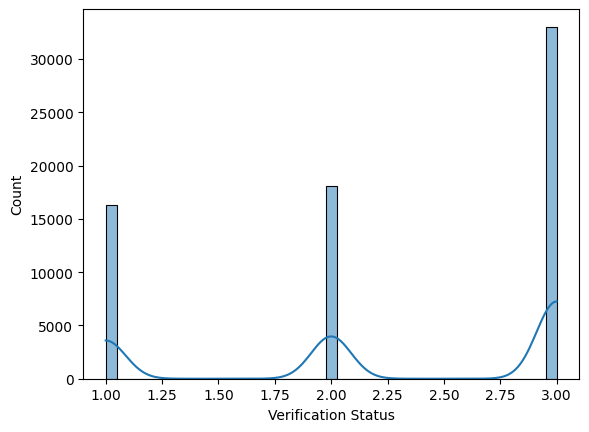

In [132]:
sns.histplot(df['Verification Status'], kde=True)

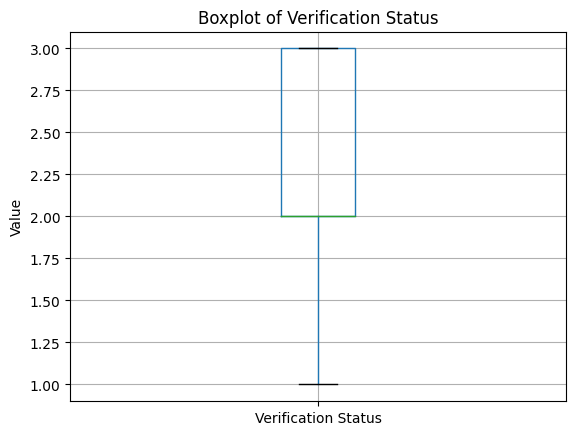

In [133]:
df.boxplot(column='Verification Status')
plt.title('Boxplot of Verification Status')
plt.ylabel('Value')
plt.show()

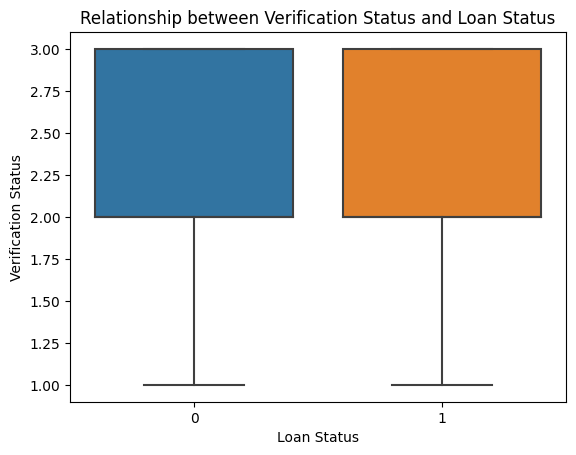

In [134]:
sns.boxplot(x='Loan Status', y='Verification Status', data=df)
plt.title('Relationship between Verification Status and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.show()

In [135]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.50


In [136]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Payment Plan']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [137]:
df['Loan Title'].mode()

0    4.0
Name: Loan Title, dtype: float64

In [138]:
df['Loan Title'].fillna(value=4, inplace=True)

In [139]:
df.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [140]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Title']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.52
precision: 0.50
recall: 0.54


In [141]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Debit to Income']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48


In [142]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Delinquency - two years']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.33
precision: 0.52
recall: 0.24


In [143]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Inquires - six months']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [144]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.62


In [145]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Public Record']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.13
precision: 0.53
recall: 0.07


In [146]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Revolving Balance']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56


In [147]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Revolving Utilities']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.50


In [148]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Accounts']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.31
precision: 0.52
recall: 0.22


In [149]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.48


In [150]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Received Interest']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.38
precision: 0.51
recall: 0.30


In [151]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Received Late Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.11
precision: 0.54
recall: 0.06


In [152]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Recoveries']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.43
precision: 0.51
recall: 0.36


In [154]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Collection 12 months Medical']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [155]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Application Type']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [156]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Last week Pay']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.49
precision: 0.51
recall: 0.47


In [157]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Accounts Delinquent']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [158]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Collection Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.13
precision: 0.54
recall: 0.08


In [159]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Current Balance']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.45
precision: 0.51
recall: 0.40


In [160]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00


In [ ]:
#Model selection based on top performing models after running baseline models and recording top
#performers and combining high performing models

In [161]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Funded Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.49


In [162]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Interest Rate']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51


In [163]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.58
precision: 0.57
recall: 0.58


In [164]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Sub Grade']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.44


In [165]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.70


In [166]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.60
f1 score: 0.64
precision: 0.59
recall: 0.72


In [167]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Loan Title']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.51


In [168]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Debit to Income']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.50


In [169]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.53
f1 score: 0.59
precision: 0.52
recall: 0.68


In [170]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Revolving Balance']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.51


In [171]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Revolving Utilities']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.50


In [172]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.70


In [173]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.62


In [174]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Last week Pay']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.50
precision: 0.51
recall: 0.50


In [175]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Total Current Balance']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.45


In [176]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Total Revolving Credit Limit']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.50
precision: 0.51
recall: 0.49


In [177]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.52
precision: 0.59
recall: 0.46


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Funded Amount', 'Interest Rate', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Loan Title', 'Debit to Income', 'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Initial List Status', 'Collection Recovery Fee', 'Last week Pay', 'Total Current Balance', 'Total Revolving Credit Limit']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.52
f1 score: 0.52
precision: 0.52
recall: 0.52


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.64
f1 score: 0.65
precision: 0.64
recall: 0.65


In [180]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.58
f1 score: 0.58
precision: 0.58
recall: 0.59


In [181]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.64
precision: 0.63
recall: 0.66


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.56
precision: 0.58
recall: 0.53


In [183]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.64
f1 score: 0.63
precision: 0.64
recall: 0.63


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.65
precision: 0.62
recall: 0.68


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.72


In [186]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.64
f1 score: 0.67
precision: 0.63
recall: 0.71


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Verification Status', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.64
f1 score: 0.66
precision: 0.62
recall: 0.70


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.57
precision: 0.57
recall: 0.58


In [189]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.60
precision: 0.66
recall: 0.55


In [190]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.63
precision: 0.62
recall: 0.65


In [191]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.62
precision: 0.64
recall: 0.60


In [192]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.60
precision: 0.66
recall: 0.55


In [193]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.65
f1 score: 0.67
precision: 0.63
recall: 0.72


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [194]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.64
precision: 0.63
recall: 0.66


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.65
f1 score: 0.66
precision: 0.64
recall: 0.68


In [196]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.69


In [197]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.61
precision: 0.65
recall: 0.58


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [198]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.63
precision: 0.62
recall: 0.65


In [199]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.60
precision: 0.65
recall: 0.56


In [200]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.64
precision: 0.61
recall: 0.66


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.50
precision: 0.51
recall: 0.49


In [202]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Funded Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.46
precision: 0.51
recall: 0.42


In [203]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Funded Amount', 'Loan Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.50
f1 score: 0.48
precision: 0.51
recall: 0.46


In [204]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.58
precision: 0.57
recall: 0.59


In [205]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Loan Amount']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.58
precision: 0.57
recall: 0.58


In [206]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.70


In [207]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.65
f1 score: 0.65
precision: 0.64
recall: 0.65


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [208]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.70


In [209]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.64
f1 score: 0.64
precision: 0.64
recall: 0.64


In [210]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.60
f1 score: 0.64
precision: 0.59
recall: 0.72


In [211]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.60
f1 score: 0.65
precision: 0.59
recall: 0.72


In [212]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.58
f1 score: 0.58
precision: 0.58
recall: 0.59


In [213]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.62
precision: 0.62
recall: 0.62


In [214]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Grade', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.58
f1 score: 0.58
precision: 0.58
recall: 0.59


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [215]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Grade', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.60
precision: 0.64
recall: 0.57


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [216]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.52
f1 score: 0.58
precision: 0.52
recall: 0.67


In [217]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.64


In [218]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.55
precision: 0.58
recall: 0.52


In [219]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.64
precision: 0.62
recall: 0.66


In [220]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.59
f1 score: 0.60
precision: 0.59
recall: 0.62


In [221]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount', 'Grade', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.56
f1 score: 0.54
precision: 0.57
recall: 0.52


In [222]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.61
precision: 0.63
recall: 0.59


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.70


In [224]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount','Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.71


In [225]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Grade','Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.72


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.63
f1 score: 0.60
precision: 0.66
recall: 0.55


In [227]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.71


In [228]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Open Account','Initial List Status']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.71


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [229]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.52
f1 score: 0.57
precision: 0.52
recall: 0.65


In [230]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52


In [231]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Grade','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.57
f1 score: 0.58
precision: 0.57
recall: 0.58


In [232]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.69


In [233]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Verification Status','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.60
f1 score: 0.64
precision: 0.59
recall: 0.71


In [234]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Open Account','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.52
f1 score: 0.59
precision: 0.52
recall: 0.68


In [235]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Initial List Status','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y)

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.70


In [236]:
list_a = ['Loan Amount', 'Funded Amount', 'Interest Rate', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Loan Title', 'Debit to Income', 'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Initial List Status', 'Collection Recovery Fee', 'Last week Pay', 'Total Current Balance', 'Total Revolving Credit Limit']

list_b = ['Loan Amount', 'Funded Amount', 'Interest Rate', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Loan Title', 'Debit to Income', 'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Initial List Status', 'Collection Recovery Fee', 'Last week Pay', 'Total Current Balance', 'Total Revolving Credit Limit']

print(len(list_a))
print(len(list_b))

17
17


In [85]:
i = 0
j = 1
counter = 1
for a in list_a:
    print('i = ',i)
    print('j = ',j)
    for b in list_b:
        print(list_a[i])
        if j>16:
            break
        else:
            print(list_b[j])
        df[f'{i}+{j}'] = df[a]+df[b]
        X = df[[f'{i}+{j}']]
        y = df['Loan Status']
        oversample = SMOTE(random_state = 44)
        X,y = oversample.fit_resample(X,y)
        print('Solution no. ', counter)
        counter = counter+1
        evaluate_model(X,y)
        df[f'{i}-{j}'] = df[a]-df[b]
        X = df[[f'{i}-{j}']]
        y = df['Loan Status']
        oversample = SMOTE(random_state = 44)
        X,y = oversample.fit_resample(X,y)
        print('Solution no. ', counter)
        counter = counter+1
        evaluate_model(X,y)
        df[f'{i}*{j}'] = df[a]*df[b]
        X = df[[f'{i}*{j}']]
        y = df['Loan Status']
        oversample = SMOTE(random_state = 44)
        X,y = oversample.fit_resample(X,y)
        print('Solution no. ', counter)
        counter = counter+1
        evaluate_model(X,y)
        df[f'{i}/{j}'] = df[a]/df[b]
        try:
            X = df[[f'{i}/{j}']]
            y = df['Loan Status']
            oversample = SMOTE(random_state = 44)
            X,y = oversample.fit_resample(X,y)
            print('Solution no. ', counter)
            counter = counter+1
            evaluate_model(X,y)
        except Exception as e:
            print('Value Error')
        j = j+1    
    i = i+1
    j = i+1
    #print(df[a].head())
    #break

i =  0
j =  1
Loan Amount
Funded Amount
Solution no.  1
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  2
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  3
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  4
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Loan Amount
Interest Rate
Solution no.  5


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.46
Solution no.  6
Accuracy: 0.50
f1 score: 0.48
precision: 0.50
recall: 0.46
Solution no.  7


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  8
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Loan Amount
Grade
Solution no.  9
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  10
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  11
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  12
Accuracy: 0.50
f1 score: 0.49
precision: 0.51
recall: 0.48
Loan Amount
Sub Grade


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  13
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  14
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  15
Accuracy: 0.51
f1 score: 0.53
precision: 0.51
recall: 0.55
Solution no.  16
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.36
Loan Amount
Employment Duration
Solution no.  17
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  18
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  19
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  20


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.16
precision: 0.50
recall: 0.10
Loan Amount
Verification Status
Solution no.  21
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  22
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  23
Accuracy: 0.51
f1 score: 0.53
precision: 0.51
recall: 0.54
Solution no.  24
Accuracy: 0.50
f1 score: 0.43
precision: 0.50
recall: 0.37
Loan Amount
Loan Title
Solution no.  25
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  26
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  27
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  28


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Loan Amount
Debit to Income
Solution no.  29
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51
Solution no.  30
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  31
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.35
Solution no.  32
Accuracy: 0.51
f1 score: 0.58
precision: 0.51
recall: 0.67
Loan Amount
Open Account
Solution no.  33
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  34
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51
Solution no.  35
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  36


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.26
precision: 0.49
recall: 0.18
Loan Amount
Revolving Balance
Solution no.  37
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  38
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  39
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  40


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.39
Loan Amount
Revolving Utilities
Solution no.  41
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.52
Solution no.  42
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  43
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Value Error
Loan Amount
Initial List Status
Solution no.  44
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  45
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51
Solution no.  46
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  47
Accuracy: 0.50
f1 score: 0.57
precision: 0.50
recall: 0.67
Loan Amount
Collection Recovery Fee
Solution no.  48
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  49
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  50
Accuracy: 0.51
f1 score: 0.54
precision: 0.51
recall: 0.57
Solution no.  51
Accuracy: 0.50
f1 score: 0.45
precision: 0.51
recall

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  66
Accuracy: 0.50
f1 score: 0.37
precision: 0.50
recall: 0.29
Funded Amount
Grade
Solution no.  67
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  68
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  69
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  70
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Funded Amount
Sub Grade
Solution no.  71


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  72
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  73
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.35
Solution no.  74
Accuracy: 0.50
f1 score: 0.41
precision: 0.51
recall: 0.35
Funded Amount
Employment Duration
Solution no.  75
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  76
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  77
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  78


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.42
precision: 0.50
recall: 0.36
Funded Amount
Verification Status
Solution no.  79
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  80
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  81
Accuracy: 0.50
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  82
Accuracy: 0.50
f1 score: 0.31
precision: 0.51
recall: 0.22
Funded Amount
Loan Title
Solution no.  83
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  84
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  85
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Solution no.  86
Accuracy: 0.51
f1 score: 0.44
precision: 0.51
recall: 0.39
Funded Amount
Debit to Income
Solution no.  87
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  88
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  89
Accuracy: 0.50
f1 score: 0.42
precision: 0.51
recall: 0.36
Solution no.  90

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Funded Amount
Open Account
Solution no.  91
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  92
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  93
Accuracy: 0.50
f1 score: 0.39
precision: 0.51
recall: 0.31
Solution no.  94
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.62
Funded Amount
Revolving Balance
Solution no.  95
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  96
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  97
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  98
Accuracy: 0.50
f1 score: 0.09
precision: 0.50
recall: 0.05
Funded Amount
Revolving Utilities
Solution no.  99
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  100
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  101


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  102
Accuracy: 0.50
f1 score: 0.43
precision: 0.50
recall: 0.37
Funded Amount
Initial List Status
Solution no.  103
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  104


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.43
Solution no.  105
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Value Error
Funded Amount
Collection Recovery Fee
Solution no.  106


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.39
Solution no.  107
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  108
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  109
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Funded Amount
Last week Pay
Solution no.  110
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  111
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  112
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.61
Solution no.  113
Accuracy: 0.51
f1 score: 0.42
precision: 0.51
recall: 0.36
Funded Amount
Total Current Balance
Solution no.  114
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  115
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  116
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  117


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Funded Amount
Total Revolving Credit Limit
Solution no.  118
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  119
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  120
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Value Error
Funded Amount
i =  2
j =  3
Interest Rate
Grade
Solution no.  121
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  122
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  123
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  124
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Interest Rate
Sub Grade


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  125
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  126
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  127
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.35
Solution no.  128
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Interest Rate
Employment Duration
Solution no.  129
Accuracy: 0.50
f1 score: 0.42
precision: 0.50
recall: 0.36


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  130
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  131
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.35
Solution no.  132
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Interest Rate
Verification Status
Solution no.  133


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.47
Solution no.  134
Accuracy: 0.50
f1 score: 0.47
precision: 0.50
recall: 0.43
Solution no.  135
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  136
Accuracy: 0.50
f1 score: 0.40
precision: 0.50
recall: 0.33
Interest Rate
Loan Title
Solution no.  137
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  138
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.44
Solution no.  139
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48
Solution no.  140
Accuracy: 0.50
f1 score: 0.27
precision: 0.51
recall: 0.18
Interest Rate
Debit to Income
Solution no.  141
Accuracy: 0.50
f1 score: 0.48
precision: 0.50
recall: 0.47
Solution no.  142
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  143
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.51
Solution no.  144
Accuracy: 0.51
f1 score: 0.42
precision: 0.51
recall: 0.35
Interest Rate
Open Account
Solution no.

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Interest Rate
i =  3
j =  4
Grade
Sub Grade
Solution no.  176
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  177
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  178
Accuracy: 0.51
f1 score: 0.53
precision: 0.51
recall: 0.55
Solution no.  179
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Grade
Employment Duration


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  180
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  181
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  182
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  183


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Grade
Verification Status
Solution no.  184
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.47
Solution no.  185
Accuracy: 0.50
f1 score: 0.47
precision: 0.50
recall: 0.43
Solution no.  186
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  187
Accuracy: 0.50
f1 score: 0.52
precision: 0.51
recall: 0.53
Grade
Loan Title
Solution no.  188
Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.45
Solution no.  189
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  190
Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.45
Solution no.  191
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Grade
Debit to Income
Solution no.  192


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  193
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  194
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  195
Accuracy: 0.50
f1 score: 0.31
precision: 0.50
recall: 0.22
Grade
Open Account
Solution no.  196
Accuracy: 0.51
f1 score: 0.43
precision: 0.51
recall: 0.37
Solution no.  197
Accuracy: 0.50
f1 score: 0.29
precision: 0.51
recall: 0.20
Solution no.  198
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  199
Accuracy: 0.51
f1 score: 0.39
precision: 0.51
recall: 0.32
Grade
Revolving Balance
Solution no.  200
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.41
Solution no.  201
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.53
Solution no.  202
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  203
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.61
Grade
Revolving Utilities
Solution no.  204
Accurac

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  222
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Grade
Total Revolving Credit Limit
Solution no.  223
Accuracy: 0.51
f1 score: 0.42
precision: 0.51
recall: 0.35
Solution no.  224
Accuracy: 0.50
f1 score: 0.42
precision: 0.51
recall: 0.36
Solution no.  225
Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.62
Solution no.  226
Accuracy: 0.51
f1 score: 0.42
precision: 0.51
recall: 0.35
Grade
i =  4
j =  5
Sub Grade
Employment Duration
Solution no.  227
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  228
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  229
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  230
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Sub Grade
Verification Status
Solution no.  231
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  232
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  233
Accuracy: 0.50
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  234
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Sub Grade
Loan Title


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  235
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  236
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.44
Solution no.  237
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48
Solution no.  238
Accuracy: 0.51
f1 score: 0.52
precision: 0.51
recall: 0.53
Sub Grade
Debit to Income
Solution no.  239
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  240
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  241
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  242
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.34
Sub Grade
Open Account
Solution no.  243
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  244
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  245


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.51
f1 score: 0.49
precision: 0.51
recall: 0.48
Solution no.  246
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Sub Grade
Revolving Balance
Solution no.  247


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  248
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.41
Solution no.  249
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  250
Accuracy: 0.50
f1 score: 0.41
precision: 0.50
recall: 0.35
Sub Grade
Revolving Utilities
Solution no.  251
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  252
Accuracy: 0.51
f1 score: 0.45
precision: 0.51
recall: 0.41
Solution no.  253
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.47
Solution no.  254
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.65
Sub Grade
Initial List Status
Solution no.  255
Accuracy: 0.51
f1 score: 0.45
precision: 0.51
recall: 0.40
Solution no.  256
Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.44
Solution no.  257
Accuracy: 0.50
f1 score: 0.42
precision: 0.50
recall: 0.36
Solution no.  258
Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.62
Sub Grade
Collection Recovery Fee


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  278
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  279
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  280
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Solution no.  281
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Employment Duration
Debit to Income
Solution no.  282


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.48
precision: 0.50
recall: 0.47
Solution no.  283
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  284
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.51
Solution no.  285
Accuracy: 0.51
f1 score: 0.53
precision: 0.51
recall: 0.55
Employment Duration
Open Account
Solution no.  286
Accuracy: 0.51
f1 score: 0.43
precision: 0.51
recall: 0.37
Solution no.  287
Accuracy: 0.50
f1 score: 0.29
precision: 0.51
recall: 0.20
Solution no.  288
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  289


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Employment Duration
Revolving Balance
Solution no.  290
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  291
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.41
Solution no.  292
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.49
Solution no.  293
Accuracy: 0.49
f1 score: 0.51
precision: 0.50
recall: 0.53
Employment Duration
Revolving Utilities
Solution no.  294
Accuracy: 0.51
f1 score: 0.49
precision: 0.51
recall: 0.47
Solution no.  295
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  296
Accuracy: 0.51
f1 score: 0.49
precision: 0.51
recall: 0.47
Solution no.  297
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Employment Duration
Initial List Status


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  298
Accuracy: 0.51
f1 score: 0.45
precision: 0.51
recall: 0.40
Solution no.  299
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.65
Solution no.  300
Accuracy: 0.51
f1 score: 0.45
precision: 0.51
recall: 0.40
Solution no.  301
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.65
Employment Duration
Collection Recovery Fee
Solution no.  302
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  303
Accuracy: 0.50
f1 score: 0.53
precision: 0.51
recall: 0.55
Solution no.  304
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.52
Solution no.  305
Accuracy: 0.51
f1 score: 0.55
precision: 0.51
recall: 0.60
Employment Duration
Last week Pay
Solution no.  306
Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.49
Solution no.  307
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.43
Solution no.  308
Accuracy: 0.51
f1 score: 0.52
precision: 0.51
recall: 0.53
Solution no.  309
Accuracy: 0.50
f1 score: 0.54
precision: 0.50
recall: 0.59
Employment Duration
Total Current Balance
Solution no.  310
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.66
Solution no.  311
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.65
Solution no.  312
Accuracy: 0.51
f1 score: 0.54
precision: 0.51
recall: 0.58
Solution no.  313
Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.50
Employment Duration
Total Revolving Credit Limit
Solution no.  314
Accuracy: 

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Verification Status
Debit to Income
Solution no.  321
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  322
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  323
Accuracy: 0.50
f1 score: 0.42
precision: 0.51
recall: 0.36
Solution no.  324


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Verification Status
Open Account
Solution no.  325
Accuracy: 0.50
f1 score: 0.43
precision: 0.50
recall: 0.38
Solution no.  326
Accuracy: 0.50
f1 score: 0.40
precision: 0.50
recall: 0.33
Solution no.  327
Accuracy: 0.50
f1 score: 0.37
precision: 0.51
recall: 0.29
Solution no.  328
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.41
Verification Status
Revolving Balance
Solution no.  329
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.41
Solution no.  330
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.53
Solution no.  331
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  332
Accuracy: 0.50
f1 score: 0.47
precision: 0.50
recall: 0.44
Verification Status
Revolving Utilities
Solution no.  333
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  334
Accuracy: 0.51
f1 score: 0.45
precision: 0.51
recall: 0.41
Solution no.  335
Accuracy: 0.50
f1 score: 0.49
precision: 0

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  343
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.50
Solution no.  344
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Verification Status
Last week Pay


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  345
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.44
Solution no.  346
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.55
Solution no.  347
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  348
Accuracy: 0.51
f1 score: 0.58
precision: 0.51
recall: 0.67
Verification Status
Total Current Balance
Solution no.  349
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48
Solution no.  350
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48
Solution no.  351
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48
Solution no.  352
Accuracy: 0.50
f1 score: 0.39
precision: 0.50
recall: 0.31
Verification Status
Total Revolving Credit Limit
Solution no.  353
Accuracy: 0.51
f1 score: 0.58
precision: 0.51
recall: 0.67
Solution no.  354
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.64
Solution no.  355
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.55
Solution no.  356
Accuracy: 0.51
f1 score: 0.48
precision: 0.5

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Loan Title
Open Account
Solution no.  361
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  362
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  363
Accuracy: 0.50
f1 score: 0.39
precision: 0.51
recall: 0.31
Solution no.  364


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Loan Title
Revolving Balance
Solution no.  365
Accuracy: 0.50
f1 score: 0.46
precision: 0.51
recall: 0.43
Solution no.  366
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  367
Accuracy: 0.50
f1 score: 0.46
precision: 0.51
recall: 0.43
Solution no.  368
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.40
Loan Title
Revolving Utilities
Solution no.  369
Accuracy: 0.50
f1 score: 0.43
precision: 0.50
recall: 0.38
Solution no.  370
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.48
Solution no.  371
Accuracy: 0.50
f1 score: 0.28
precision: 0.52
recall: 0.19
Solution no.  372
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Loan Title
Initial List Status
Solution no.  373
Accuracy: 0.51
f1 score: 0.45
precision: 0.51
recall: 0.40
Solution no.  374
Accuracy: 0.51
f1 score: 0.48
precision: 0.51
recall: 0.44
Solution no.  375
Accuracy: 0.50
f1 score: 0.42
precision: 0.50
recall: 0.36
Sol

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  378
Accuracy: 0.50
f1 score: 0.53
precision: 0.51
recall: 0.55
Solution no.  379
Accuracy: 0.50
f1 score: 0.51
precision: 0.50
recall: 0.52
Solution no.  380
Accuracy: 0.51
f1 score: 0.37
precision: 0.51
recall: 0.30
Loan Title
Last week Pay
Solution no.  381
Accuracy: 0.51
f1 score: 0.47
precision: 0.51
recall: 0.44
Solution no.  382
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.55
Solution no.  383
Accuracy: 0.51
f1 score: 0.46
precision: 0.51
recall: 0.42
Solution no.  384
Accuracy: 0.50
f1 score: 0.38
precision: 0.50
recall: 0.31
Loan Title
Total Current Balance
Solution no.  385
Accuracy: 0.50
f1 score: 0.52
precision: 0.50
recall: 0.54
Solution no.  386
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  387
Accuracy: 0.50
f1 score: 0.12
precision: 0.52
recall: 0.07
Solution no.  388
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Loan Title
Total Revolving Credit Limit


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  389
Accuracy: 0.49
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  390
Accuracy: 0.50
f1 score: 0.50
precision: 0.51
recall: 0.50
Solution no.  391
Accuracy: 0.51
f1 score: 0.44
precision: 0.51
recall: 0.39
Solution no.  392
Accuracy: 0.50
f1 score: 0.40
precision: 0.51
recall: 0.33
Loan Title
i =  8
j =  9
Debit to Income
Open Account
Solution no.  393
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  394
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51
Solution no.  395
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  396
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Debit to Income
Revolving Balance


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  397
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  398
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  399
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  400
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Debit to Income
Revolving Utilities
Solution no.  401


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.48
precision: 0.50
recall: 0.46
Solution no.  402
Accuracy: 0.50
f1 score: 0.49
precision: 0.51
recall: 0.48
Solution no.  403
Accuracy: 0.50
f1 score: 0.21
precision: 0.52
recall: 0.13
Solution no.  404
Accuracy: 0.51
f1 score: 0.52
precision: 0.51
recall: 0.53
Debit to Income
Initial List Status
Solution no.  405
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.49
Solution no.  406
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.42
Solution no.  407
Accuracy: 0.50
f1 score: 0.52
precision: 0.50
recall: 0.53
Solution no.  408
Accuracy: 0.50
f1 score: 0.42
precision: 0.51
recall: 0.36
Debit to Income
Collection Recovery Fee
Solution no.  409
Accuracy: 0.51
f1 score: 0.49
precision: 0.51
recall: 0.48
Solution no.  410
Accuracy: 0.50
f1 score: 0.47
precision: 0.50
recall: 0.44
Solution no.  411
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  412
Accuracy: 0.50
f1 score: 0.18
precision: 0.49
recall: 0.11
Debit to Income
La

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  428


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Open Account
Revolving Utilities
Solution no.  429
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  430
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  431


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  432


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Open Account
Initial List Status
Solution no.  433
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.57
Solution no.  434
Accuracy: 0.51
f1 score: 0.53
precision: 0.51
recall: 0.55
Solution no.  435
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.60
Solution no.  436
Accuracy: 0.51
f1 score: 0.55
precision: 0.51
recall: 0.60
Open Account
Collection Recovery Fee
Solution no.  437
Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.64
Solution no.  438
Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.63
Solution no.  439
Accuracy: 0.50
f1 score: 0.54
precision: 0.51
recall: 0.57
Solution no.  440
Accuracy: 0.50
f1 score: 0.35
precision: 0.50
recall: 0.27
Open Account
Last week Pay
Solution no.  441
Accuracy: 0.51
f1 score: 0.49
precision: 0.51
recall: 0.47
Solution no.  442
Accuracy: 0.50
f1 score: 0.17
precision: 0.49
recall: 0.11
Solution no.  443
Accuracy: 0.51
f1 score: 0.54
precision: 0.51
recall: 0.

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  458
Accuracy: 0.50
f1 score: 0.46
precision: 0.50
recall: 0.43
Solution no.  459


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  460
Accuracy: 0.50
f1 score: 0.56
precision: 0.50
recall: 0.64
Revolving Balance
Collection Recovery Fee
Solution no.  461
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56
Solution no.  462
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56
Solution no.  463
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  464
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56
Revolving Balance
Last week Pay
Solution no.  465
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56
Solution no.  466
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56
Solution no.  467
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Solution no.  468
Accuracy: 0.50
f1 score: 0.37
precision: 0.51
recall: 0.30
Revolving Balance
Total Current Balance
Solution no.  469
Accuracy: 0.50
f1 score: 0.53
precision: 0.50
recall: 0.56
Solution no.  470
Accuracy: 0.50
f1 score: 0.53
precision

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Revolving Utilities
Collection Recovery Fee
Solution no.  481
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.39
Solution no.  482
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  483
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  484


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Revolving Utilities
Last week Pay
Solution no.  485
Accuracy: 0.51
f1 score: 0.50
precision: 0.51
recall: 0.50
Solution no.  486
Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.49
Solution no.  487
Accuracy: 0.50
f1 score: 0.47
precision: 0.51
recall: 0.43
Solution no.  488
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.41
Revolving Utilities
Total Current Balance
Solution no.  489
Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.49
Solution no.  490
Accuracy: 0.50
f1 score: 0.50
precision: 0.50
recall: 0.50
Solution no.  491
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  492
Accuracy: 0.51
f1 score: 0.44
precision: 0.51
recall: 0.38
Revolving Utilities
Total Revolving Credit Limit
Solution no.  493
Accuracy: 0.50
f1 score: 0.49
precision: 0.50
recall: 0.47
Solution no.  494
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51
Solution no.  495
Accuracy: 0.50
f1 score: 0.33
precision: 0.50
recall: 0.25
Solution no.  496
Accuracy: 0.50
f1 score: 0.29
precision: 0.50
recall: 0.21
Revolving Utilities
i =  12
j =  13
Initial List Status
Collection Recovery Fee
Solution no.  497
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  498
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  499
Accuracy: 0.51
f1 score: 0.54
precision: 0.51
recall: 0.57
Solution no.  500
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Initial List Status
Last week Pay


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  501
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  502
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  503
Accuracy: 0.50
f1 score: 0.55
precision: 0.50
recall: 0.61
Solution no.  504
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Initial List Status
Total Current Balance


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  505
Accuracy: 0.49
f1 score: 0.42
precision: 0.49
recall: 0.36
Solution no.  506
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.41
Solution no.  507
Accuracy: 0.50
f1 score: 0.52
precision: 0.50
recall: 0.55
Solution no.  508
Accuracy: 0.51
f1 score: 0.54
precision: 0.51
recall: 0.57
Initial List Status
Total Revolving Credit Limit
Solution no.  509
Accuracy: 0.51
f1 score: 0.42
precision: 0.51
recall: 0.35
Solution no.  510
Accuracy: 0.50
f1 score: 0.42
precision: 0.51
recall: 0.36
Solution no.  511
Accuracy: 0.51
f1 score: 0.56
precision: 0.51
recall: 0.62
Solution no.  512
Accuracy: 0.50
f1 score: 0.34
precision: 0.51
recall: 0.26
Initial List Status
i =  13
j =  14
Collection Recovery Fee
Last week Pay
Solution no.  513
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  514
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.51
Solution no.  515
Accuracy: 0.51
f1 score: 0.57
precision: 0.51
recall: 0.66
Solution no.  516
Accuracy: 0.

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  517
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  518
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  519
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  520
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Collection Recovery Fee
Total Revolving Credit Limit


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  521
Accuracy: 0.50
f1 score: 0.34
precision: 0.50
recall: 0.26
Solution no.  522
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.41
Solution no.  523
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  524
Accuracy: 0.51
f1 score: 0.54
precision: 0.51
recall: 0.58
Collection Recovery Fee
i =  14
j =  15
Last week Pay
Total Current Balance
Solution no.  525
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  526
Accuracy: 0.51
f1 score: 0.51
precision: 0.51
recall: 0.52
Solution no.  527
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  528
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Last week Pay
Total Revolving Credit Limit


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  529
Accuracy: 0.50
f1 score: 0.44
precision: 0.51
recall: 0.38
Solution no.  530
Accuracy: 0.50
f1 score: 0.44
precision: 0.50
recall: 0.38
Solution no.  531
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  532
Accuracy: 0.50
f1 score: 0.00
precision: 0.00
recall: 0.00
Last week Pay
i =  15
j =  16
Total Current Balance
Total Revolving Credit Limit


C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Solution no.  533
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  534
Accuracy: 0.50
f1 score: 0.45
precision: 0.50
recall: 0.40
Solution no.  535
Accuracy: 0.50
f1 score: 0.67
precision: 0.50
recall: 1.00
Solution no.  536
Accuracy: 0.50
f1 score: 0.37
precision: 0.51
recall: 0.29
Total Current Balance
i =  16
j =  17
Total Revolving Credit Limit


In [ ]:
#Implementing the stacking approach

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [238]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Grade']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.59
f1 score: 0.66
precision: 0.57
recall: 0.80


In [239]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.70


In [240]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.61
f1 score: 0.65
precision: 0.59
recall: 0.72


In [241]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.54
f1 score: 0.59
precision: 0.54
recall: 0.65


In [242]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.65
precision: 0.60
recall: 0.70


In [243]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.56
f1 score: 0.60
precision: 0.55
recall: 0.65


In [244]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Grade','Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.65
precision: 0.67
recall: 0.63


In [245]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Grade','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.65
f1 score: 0.65
precision: 0.66
recall: 0.64


In [246]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Grade','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.69
precision: 0.64
recall: 0.74


In [247]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Grade','Employment Duration','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.70
f1 score: 0.70
precision: 0.69
recall: 0.72


In [248]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.68
recall: 0.52


In [249]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.68
recall: 0.53


In [250]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.67
precision: 0.66
recall: 0.68


In [251]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Verification Status','Open Account','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.67
f1 score: 0.67
precision: 0.67
recall: 0.67


In [252]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.52
f1 score: 0.54
precision: 0.52
recall: 0.57


In [253]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.51
f1 score: 0.59
precision: 0.51
recall: 0.69


In [254]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.65
f1 score: 0.65
precision: 0.66
recall: 0.64


In [255]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.69
precision: 0.64
recall: 0.74


In [256]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade', 'Employment Duration', 'Verification Status', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.70
f1 score: 0.70
precision: 0.69
recall: 0.72


In [257]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.68
recall: 0.52


In [258]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.63
f1 score: 0.65
precision: 0.62
recall: 0.69


In [259]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.60
precision: 0.68
recall: 0.54


In [260]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.68
recall: 0.53


In [261]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.67
precision: 0.66
recall: 0.68


In [262]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.60
precision: 0.69
recall: 0.53


In [263]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.67
f1 score: 0.67
precision: 0.67
recall: 0.67


In [264]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.63
f1 score: 0.64
precision: 0.63
recall: 0.65


In [265]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.64
precision: 0.65
recall: 0.64


In [266]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.63
precision: 0.65
recall: 0.61


In [267]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.65
precision: 0.64
recall: 0.65


In [268]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.68
f1 score: 0.69
precision: 0.66
recall: 0.73


In [269]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.70


In [270]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.65
precision: 0.67
recall: 0.63


In [271]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.70


In [272]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.65
f1 score: 0.64
precision: 0.66
recall: 0.62


In [273]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.61
f1 score: 0.65
precision: 0.59
recall: 0.71


In [274]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.61
f1 score: 0.64
precision: 0.59
recall: 0.69


In [275]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.68
recall: 0.52


In [276]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Grade', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.67
precision: 0.65
recall: 0.70


In [277]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.55
f1 score: 0.59
precision: 0.54
recall: 0.65


In [278]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.63
f1 score: 0.66
precision: 0.61
recall: 0.70


In [279]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.61
f1 score: 0.65
precision: 0.60
recall: 0.70


In [280]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.69
recall: 0.51


In [281]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.65
precision: 0.61
recall: 0.70


In [282]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.66
precision: 0.60
recall: 0.72


In [283]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Grade','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.66
f1 score: 0.65
precision: 0.67
recall: 0.63


In [284]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.69
recall: 0.52


In [285]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.59
precision: 0.69
recall: 0.52


In [286]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Open Account','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.63
f1 score: 0.64
precision: 0.62
recall: 0.67


In [287]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.56
f1 score: 0.63
precision: 0.55
recall: 0.76


In [288]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.64
f1 score: 0.64
precision: 0.63
recall: 0.65


In [289]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Verification Status','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.62
f1 score: 0.64
precision: 0.61
recall: 0.68


In [290]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Open Account','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.57
f1 score: 0.60
precision: 0.56
recall: 0.65


In [291]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Initial List Status','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=44))

Accuracy: 0.63
f1 score: 0.64
precision: 0.63
recall: 0.65


In [ ]:
#Random Forest Classifier

In [292]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.74
f1 score: 0.75
precision: 0.72
recall: 0.78


In [293]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.71
f1 score: 0.72
precision: 0.70
recall: 0.75


In [294]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.72
f1 score: 0.73
precision: 0.70
recall: 0.75


In [295]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.71
f1 score: 0.72
precision: 0.69
recall: 0.76


In [296]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.69
f1 score: 0.70
precision: 0.68
recall: 0.72


In [297]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.63
f1 score: 0.63
precision: 0.62
recall: 0.64


In [298]:
#Highest till now
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade','Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.78
f1 score: 0.79
precision: 0.76
recall: 0.83


In [299]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.78
f1 score: 0.79
precision: 0.76
recall: 0.82


In [300]:
#Even higher
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.80
f1 score: 0.81
precision: 0.78
recall: 0.85


In [301]:
#Even higher
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Grade','Employment Duration','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.81
f1 score: 0.82
precision: 0.78
recall: 0.87


In [302]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.78
f1 score: 0.79
precision: 0.76
recall: 0.82


In [303]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.76
f1 score: 0.77
precision: 0.74
recall: 0.79


In [304]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.81
f1 score: 0.82
precision: 0.79
recall: 0.85


In [305]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount','Employment Duration','Verification Status','Open Account','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.75
f1 score: 0.77
precision: 0.73
recall: 0.80


In [306]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.62
f1 score: 0.63
precision: 0.61
recall: 0.64


In [307]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.75
f1 score: 0.75
precision: 0.74
recall: 0.77


In [308]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.74
f1 score: 0.75
precision: 0.72
recall: 0.78


In [309]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.75
f1 score: 0.76
precision: 0.72
recall: 0.80


In [310]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.74
f1 score: 0.76
precision: 0.72
recall: 0.79


In [311]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.75
f1 score: 0.77
precision: 0.73
recall: 0.80


In [312]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.68
f1 score: 0.68
precision: 0.67
recall: 0.69


In [313]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.71
f1 score: 0.72
precision: 0.71
recall: 0.73


In [314]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Open Account', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.69
f1 score: 0.70
precision: 0.69
recall: 0.72


In [315]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.71
f1 score: 0.72
precision: 0.70
recall: 0.73


In [316]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status', 'Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.75
f1 score: 0.75
precision: 0.74
recall: 0.77


In [317]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.70
f1 score: 0.71
precision: 0.70
recall: 0.72


In [318]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.78
f1 score: 0.79
precision: 0.76
recall: 0.82


In [319]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.79
f1 score: 0.80
precision: 0.78
recall: 0.82


In [320]:
#higher
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Grade', 'Loan Amount', 'Employment Duration']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.81
f1 score: 0.82
precision: 0.79
recall: 0.85


In [321]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.71
f1 score: 0.71
precision: 0.70
recall: 0.73


In [322]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.79
f1 score: 0.80
precision: 0.78
recall: 0.83


In [323]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.77
f1 score: 0.78
precision: 0.76
recall: 0.80


In [324]:
#higher
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Loan Amount', 'Grade', 'Employment Duration', 'Verification Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.82
f1 score: 0.83
precision: 0.80
recall: 0.86


In [325]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.71
f1 score: 0.72
precision: 0.69
recall: 0.75


In [326]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Employment Duration', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.73
f1 score: 0.75
precision: 0.71
recall: 0.78


In [327]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.73
f1 score: 0.74
precision: 0.71
recall: 0.79


In [328]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration', 'Verification Status', 'Open Account']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.74
f1 score: 0.76
precision: 0.72
recall: 0.79


In [329]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.68
f1 score: 0.69
precision: 0.67
recall: 0.70


In [330]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Loan Amount','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.79
f1 score: 0.79
precision: 0.77
recall: 0.81


In [331]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Grade','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.77
f1 score: 0.78
precision: 0.75
recall: 0.81


In [332]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.76
f1 score: 0.76
precision: 0.75
recall: 0.78


In [333]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Verification Status','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.76
f1 score: 0.77
precision: 0.74
recall: 0.79


In [334]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Open Account','Initial List Status']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.74
f1 score: 0.75
precision: 0.71
recall: 0.78


In [335]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.64
f1 score: 0.64
precision: 0.64
recall: 0.65


In [336]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Employment Duration','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.68
f1 score: 0.69
precision: 0.68
recall: 0.70


In [337]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Verification Status','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.69
f1 score: 0.69
precision: 0.68
recall: 0.71


In [338]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Open Account','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.67
f1 score: 0.67
precision: 0.66
recall: 0.69


In [339]:
oversample = SMOTE(random_state = 44)
X,y = oversample.fit_resample(df[['Total Revolving Credit Limit','Initial List Status','Collection Recovery Fee']], df['Loan Status'])
evaluate_model(X,y, model=RandomForestClassifier(n_estimators=100, random_state=44))

Accuracy: 0.68
f1 score: 0.69
precision: 0.67
recall: 0.70


In [ ]:
#Top performing models Loan Amount-Grade,Loan Amount-Employment Duration,Loan Amount-Verification Status
#Loan Amount-Open Account,Loan Amount-Initial List Status,Loan Amount-Collection Recovery Fee,
#Loan Amount-Grade-Employment Duration,Loan Amount-Grade-Initial List Status,Loan Amount-Grade-Employment Duration-Initial List Status
#Loan Amount-Grade-Employment Duration-Verification Status-Initial List Status,
#Loan Amount-Employment Duration-Verification Status,Loan Amount-Employment Duration-Initial List Status
#Loan Amount-Employment Duration-Verification Status-Initial List Status,
#Loan Amount-Employment Duration-Verification Status-Open Account-Initial List Status
#Total Revolving Credit Limit,
#Total Revolving Credit Limit-Loan Amount,

In [ ]:
#'Loan Amount', 'Employment Duration', 'Open Account'
#'Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account'
#'Loan Amount', 'Employment Duration', 'Open Account', 'Initial List Status'
#'Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status'
#'Loan Amount', 'Employment Duration', 'Collection Recovery Fee'
#'Loan Amount', 'Employment Duration', 'Verification Status', 'Collection Recovery Fee'
#'Loan Amount', 'Employment Duration', 'Open Account', 'Collection Recovery Fee'
#'Loan Amount', 'Employment Duration', 'Initial List Status', 'Collection Recovery Fee'
#'Loan Amount', 'Employment Duration', 'Verification Status', 'Open Account', 'Initial List Status', 'Collection Recovery Fee'
#'Total Revolving Credit Limit', 'Employment Duration'
#'Total Revolving Credit Limit', 'Grade', 'Employment Duration'
#'Total Revolving Credit Limit', 'Loan Amount', 'Employment Duration'
#'Total Revolving Credit Limit', 'Grade', 'Loan Amount', 'Employment Duration'
#'Total Revolving Credit Limit', 'Verification Status'
#'Total Revolving Credit Limit', 'Loan Amount', 'Verification Status'
#'Total Revolving Credit Limit', 'Employment Duration', 'Verification Status'
#'Total Revolving Credit Limit', 'Loan Amount', 'Grade', 'Employment Duration', 'Verification Status'
#'Total Revolving Credit Limit', 'Open Account'
#'Total Revolving Credit Limit', 'Employment Duration', 'Open Account'
#'Total Revolving Credit Limit', 'Verification Status', 'Open Account'
#'Total Revolving Credit Limit','Employment Duration', 'Verification Status', 'Open Account'
#'Total Revolving Credit Limit','Initial List Status'
#'Total Revolving Credit Limit','Loan Amount','Initial List Status'
#'Total Revolving Credit Limit','Grade','Initial List Status'
#'Total Revolving Credit Limit','Employment Duration','Initial List Status'
#'Total Revolving Credit Limit','Verification Status','Initial List Status'
#'Total Revolving Credit Limit','Open Account','Initial List Status'
#'Total Revolving Credit Limit','Collection Recovery Fee'
#'Total Revolving Credit Limit','Employment Duration','Collection Recovery Fee'
#'Total Revolving Credit Limit','Verification Status','Collection Recovery Fee'
#'Total Revolving Credit Limit','Open Account','Collection Recovery Fee'
#'Total Revolving Credit Limit','Initial List Status','Collection Recovery Fee'
#

In [340]:
df[284:288].head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,FundedAmountBin,FundedAmountBins,fai,FundedAmountInvestorBin,FundedAmountInvestorBins,HighFundedRisk,FundedBin,ir,InterestRateBin,InterestRateBins
284,33104039,28730,7189,8720.383686,59,BAT2558388,14.150335,2,35,1,...,"(980.015, 7811.0]",1,8720.383686,"(1080.705, 9585.879]",1,0,1,14.150335,"(5.298, 16.251]",1
285,5449650,19228,17077,15596.512860,58,BAT2252229,10.008893,6,34,2,...,"(14608.0, 21405.0]",3,15596.512860,"(9585.879, 18057.168]",2,1,3,10.008893,"(5.298, 16.251]",1
286,4231875,12872,7113,14199.811620,58,BAT2136391,11.814016,7,20,2,...,"(980.015, 7811.0]",1,14199.811620,"(9585.879, 18057.168]",2,1,3,11.814016,"(5.298, 16.251]",1
287,29281659,28655,12128,23056.514520,59,BAT2833642,8.891787,4,33,1,...,"(7811.0, 14608.0]",2,23056.514520,"(18057.168, 26528.457]",3,1,4,8.891787,"(5.298, 16.251]",1
